In [506]:
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://www.bikewale.com/best-bikes-in-india/?sortOrder1=desc&sortField1=modelPopularity&pageNumber=0"
page = requests.get(url)

In [3]:
page

<Response [200]>

In [4]:
page.text

'\n<!DOCTYPE html><html lang="en" itemscope itemtype="http://schema.org/WebPage" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb#"><head><link rel="preload" href="https://stc.aeplcdn.com/fonts/lato-bold.woff2" as="font" type="font/woff2" crossorigin><link rel="preload" href="https://stc.aeplcdn.com/fonts/lato-regular.woff2" as="font" type="font/woff2" crossorigin>\n    <title data-react-helmet="true" itemprop="name">Best Bikes in India - August 2023 | Top 10 Bikes - BikeWale</title>\n    \n    <link data-chunk="new-bike-search" rel="preload" as="style" href="https://stb.aeplcdn.com/bikewale/UI/pwa/client-build-legacy/css/new-bike-search-97e3775c.51a7f6721f457d00b871.css"><link data-chunk="main-desktop" rel="preload" as="style" href="https://stb.aeplcdn.com/bikewale/UI/pwa/client-build-legacy/css/main-desktop-f861ba06.a2278851377e11611d39.css">\n\n\n<link rel="preconnect" href="https://www.googletagmanager.com" /><link rel="preconnect" href="https://www.googletagservices.com" /><l

In [5]:
soup = BeautifulSoup(page.text)
soup

<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/WebPage" lang="en" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb#"><head><link as="font" crossorigin="" href="https://stc.aeplcdn.com/fonts/lato-bold.woff2" rel="preload" type="font/woff2"/><link as="font" crossorigin="" href="https://stc.aeplcdn.com/fonts/lato-regular.woff2" rel="preload" type="font/woff2"/>
<title data-react-helmet="true" itemprop="name">Best Bikes in India - August 2023 | Top 10 Bikes - BikeWale</title>
<link as="style" data-chunk="new-bike-search" href="https://stb.aeplcdn.com/bikewale/UI/pwa/client-build-legacy/css/new-bike-search-97e3775c.51a7f6721f457d00b871.css" rel="preload"/><link as="style" data-chunk="main-desktop" href="https://stb.aeplcdn.com/bikewale/UI/pwa/client-build-legacy/css/main-desktop-f861ba06.a2278851377e11611d39.css" rel="preload"/>
<link href="https://www.googletagmanager.com" rel="preconnect"/><link href="https://www.googletagservices.com" rel="preconnect"/><link href="ht

In [6]:
model = []
for i in soup.find_all("span", class_="o-eZTujG o-bkmzIL o-eqqVmt o-fzpibr"):
    model.append(i.text)
model

['TVS Raider 125',
 'Royal Enfield Hunter 350',
 'Harley-Davidson X440',
 'Honda SP 125',
 'Honda SP160',
 'Hero Splendor Plus',
 'TVS Apache RTR 160',
 'Honda Activa 6G',
 'Royal Enfield Bullet 350',
 'TVS Ntorq 125',
 'Honda Shine',
 'Yamaha R15 V4',
 'Yamaha MT 15 V2',
 'Royal Enfield Classic 350',
 'Bajaj Pulsar RS 200',
 'Bajaj Pulsar NS200',
 'KTM 200 Duke',
 'TVS Jupiter',
 'Royal Enfield Continental GT 650',
 'Triumph Speed 400',
 'Royal Enfield Meteor 350',
 'TVS Ronin',
 'Hero HF Deluxe',
 'Jawa 42',
 'Yamaha FZ FI',
 'TVS Apache RTR 160 4V',
 'Honda Activa 125',
 'Honda Unicorn',
 'Royal Enfield Himalayan',
 'Bajaj Pulsar 150']

In [7]:
len(model)

30

<div class="o-fcaNGp o-dsiSgT o-NBTwp o-dGBYL GdlcLj"><div class="o-cpnuEd o-dsiSgT o-NBTwp "><div class="o-bUlUGg o-emJYLF o-NBTwp o-dsiSgT o-cpnuEd asTPXk"><div class="o-bmFSid o-bqHweY  ekFNSi"><svg class="o-bVnkiJ o-eurOBO hEA0Im o-eNNlqh" fill="currentcolor" role="img" aria-label="rating icon" viewBox="0 0 11.62 11.06"><path xmlns="http://www.w3.org/2000/svg" d="M11.55 4.44l-2.7 2.63.64 3.72a.26.26 0 0 1-.1.23.21.21 0 0 1-.24 0L5.81 9.28 2.47 11a.22.22 0 0 1-.24 0 .24.24 0 0 1-.1-.23l.64-3.72-2.7-2.61A.23.23 0 0 1 0 4.2.26.26 0 0 1 .2 4l3.73-.5L5.6.12a.24.24 0 0 1 .4 0L7.69 3.5l3.73.5a.26.26 0 0 1 .19.16.26.26 0 0 1-.06.28z"></path></svg></div></div><p class="o-eemiLE o-bdcqVx o-cKuOoN o-lIIwF o-eZTujG">4.3<span class="o-bzsJdq o-dnAjKa">/5</span></p></div></div>

In [8]:
a='<div class="o-fcaNGp o-dsiSgT o-NBTwp o-dGBYL GdlcLj"><div class="o-cpnuEd o-dsiSgT o-NBTwp "><div class="o-bUlUGg o-emJYLF o-NBTwp o-dsiSgT o-cpnuEd asTPXk"><div class="o-bmFSid o-bqHweY  ekFNSi"><svg class="o-bVnkiJ o-eurOBO hEA0Im o-eNNlqh" fill="currentcolor" role="img" aria-label="rating icon" viewBox="0 0 11.62 11.06"><path xmlns="http://www.w3.org/2000/svg" d="M11.55 4.44l-2.7 2.63.64 3.72a.26.26 0 0 1-.1.23.21.21 0 0 1-.24 0L5.81 9.28 2.47 11a.22.22 0 0 1-.24 0 .24.24 0 0 1-.1-.23l.64-3.72-2.7-2.61A.23.23 0 0 1 0 4.2.26.26 0 0 1 .2 4l3.73-.5L5.6.12a.24.24 0 0 1 .4 0L7.69 3.5l3.73.5a.26.26 0 0 1 .19.16.26.26 0 0 1-.06.28z"></path></svg></div></div><p class="o-eemiLE o-bdcqVx o-cKuOoN o-lIIwF o-eZTujG">4.3<span class="o-bzsJdq o-dnAjKa">/5</span></p></div></div>'
a=BeautifulSoup(a)
a.text

'4.3/5'

In [9]:
soup



<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/WebPage" lang="en" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb#"><head><link as="font" crossorigin="" href="https://stc.aeplcdn.com/fonts/lato-bold.woff2" rel="preload" type="font/woff2"/><link as="font" crossorigin="" href="https://stc.aeplcdn.com/fonts/lato-regular.woff2" rel="preload" type="font/woff2"/>
<title data-react-helmet="true" itemprop="name">Best Bikes in India - August 2023 | Top 10 Bikes - BikeWale</title>
<link as="style" data-chunk="new-bike-search" href="https://stb.aeplcdn.com/bikewale/UI/pwa/client-build-legacy/css/new-bike-search-97e3775c.51a7f6721f457d00b871.css" rel="preload"/><link as="style" data-chunk="main-desktop" href="https://stb.aeplcdn.com/bikewale/UI/pwa/client-build-legacy/css/main-desktop-f861ba06.a2278851377e11611d39.css" rel="preload"/>
<link href="https://www.googletagmanager.com" rel="preconnect"/><link href="https://www.googletagservices.com" rel="preconnect"/><link href="ht

In [10]:
rating = [] 
b=soup.find_all("div", class_="o-fcaNGp o-dsiSgT o-NBTwp o-dGBYL GdlcLj")
for i in soup.find_all("div", class_="o-fcaNGp o-dsiSgT o-NBTwp o-dGBYL GdlcLj"):
     print(i.text)


4.3/5
4.6/5
4.8/5
4.4/5
4.1/5
4.5/5
4.5/5
4/5
4.7/5
4.4/5
4.4/5
4.7/5
4.7/5
4.5/5
4.7/5
4.7/5
4.6/5
4.3/5
4.7/5
4.8/5
4.5/5
4.7/5
4.5/5
4.2/5
4.6/5
4.5/5
4.4/5
4.2/5
4.5/5
4.5/5


In [11]:
rating = []
for i in soup.find_all("p", class_="o-eemiLE o-bdcqVx o-cKuOoN o-lIIwF o-eZTujG"):
    text = i.text
    rating.append(text)
rating

['4.3/5',
 '4.6/5',
 '4.8/5',
 '4.4/5',
 '4.1/5',
 '4.5/5',
 '4.5/5',
 '4/5',
 '4.7/5',
 '4.4/5',
 '4.4/5',
 '4.7/5',
 '4.7/5',
 '4.5/5',
 '4.7/5',
 '4.7/5',
 '4.6/5',
 '4.3/5',
 '4.7/5',
 '4.8/5',
 '4.5/5',
 '4.7/5',
 '4.5/5',
 '4.2/5',
 '4.6/5',
 '4.5/5',
 '4.4/5',
 '4.2/5',
 '4.5/5',
 '4.5/5']

In [12]:
rating = []
for i in soup.find_all("p", class_="o-eemiLE o-bdcqVx o-cKuOoN o-lIIwF o-eZTujG"):
    text = i.text
    regex = re.findall('\d\.?\d?',text)
    if regex:
        rating.append(regex[0])
    else:
        rating.append(np.nan)
rating

['4.3',
 '4.6',
 '4.8',
 '4.4',
 '4.1',
 '4.5',
 '4.5',
 '4',
 '4.7',
 '4.4',
 '4.4',
 '4.7',
 '4.7',
 '4.5',
 '4.7',
 '4.7',
 '4.6',
 '4.3',
 '4.7',
 '4.8',
 '4.5',
 '4.7',
 '4.5',
 '4.2',
 '4.6',
 '4.5',
 '4.4',
 '4.2',
 '4.5',
 '4.5']

In [13]:
len(rating)

30

In [14]:
no_of_rating = []
for i in soup.find_all("span", class_="o-bzsJdq o-fzpimR o-KxopV o-sTQWx o-dThPjR"):
    text = i.text
    regex = re.findall("(\d+)\sRatings", text)
    if regex:
        no_of_rating.append(regex)
    else:
        no_of_rating.append(np.nan)
no_of_rating

[['1029'],
 ['535'],
 ['118'],
 ['1247'],
 ['16'],
 ['2497'],
 ['2672'],
 ['1150'],
 ['3400'],
 ['1585'],
 ['2734'],
 ['476'],
 ['413'],
 ['538'],
 ['1778'],
 ['2644'],
 ['178'],
 ['2050'],
 ['455'],
 ['57'],
 ['459'],
 ['205'],
 ['2508'],
 ['495'],
 ['362'],
 ['1829'],
 ['1103'],
 ['631'],
 ['906'],
 ['3726']]

In [15]:
len(no_of_rating)

30

In [16]:
cc = []
for i in soup.find_all("div", class_="o-bqHweY o-bVSleT o-bwCunT o-bfyaNx o-bNxxEB o-fzpihx"):
    text = i.text
    regex = re.findall("(.*)\scc", text)
    if regex:
        cc.append(regex)
    else:
        cc.append(np.nan)
cc

[['124.8'],
 ['349.34'],
 ['440'],
 ['124'],
 nan,
 ['97.2'],
 ['159.7'],
 ['109.51'],
 ['346'],
 ['124.8'],
 ['123.94'],
 ['155'],
 ['155'],
 ['349'],
 ['199.5'],
 ['199.5'],
 ['199.5'],
 ['109.7'],
 ['648'],
 ['398.15'],
 ['349'],
 ['225.9'],
 ['97.2'],
 ['294.72'],
 ['149'],
 ['159.7'],
 ['124'],
 ['162.7'],
 ['411'],
 ['149.5']]

In [17]:
len(cc)

30

In [18]:
mileage = []
for i in soup.find_all("div", class_="o-bqHweY o-bVSleT o-bwCunT o-bfyaNx o-bNxxEB o-fzpihx"):
    text = i.text
    regex = re.findall("cc\|(.*)\skmpl", text)
    if regex:
        mileage.append(regex)
    else:
        mileage.append(np.nan)
mileage

[['57'],
 ['36'],
 ['35'],
 nan,
 nan,
 nan,
 ['61'],
 nan,
 nan,
 nan,
 nan,
 ['51'],
 nan,
 ['32'],
 nan,
 nan,
 nan,
 nan,
 nan,
 ['30'],
 ['33'],
 ['42'],
 nan,
 nan,
 nan,
 ['41'],
 nan,
 nan,
 ['31'],
 nan]

In [19]:
len(mileage)

30

In [20]:
bhp = []
KG=[]
for i in  soup.find_all("div",class_="o-fzptVd o-fzptYr o-fzpimw o-fzpibK o-bCRRBE o-cpnuEd o-dsiSgT"):
        KG_BHP = i.find("div", class_="o-bqHweY o-bVSleT o-bwCunT o-bfyaNx o-bNxxEB o-fzpihx")
        text = KG_BHP.text
        a=text.split('bhp')#.split('|')[-1]
        KG_type=text.replace('Kg','kg').replace('KG','kg')
        kg=KG_type.split('kg')
        #print(text,a,a[0])
        if len(a)>1:
            b=a[0].split('|')[-1]
            bhp.append(b)
        else:
            bhp.append(np.NAN)
        if len(kg[0])>1:
            c=kg[0].split('|')[-1]
            KG.append(c)
        else:
            KG.append(np.NAN)
    #     print(text,a,a[0],b,sep='----')
        print(text,kg,kg[0],c,sep='----')
        


124.8 cc|57 kmpl|11.2 bhp|123 Kg----['124.8 cc|57 kmpl|11.2 bhp|123 ', '']----124.8 cc|57 kmpl|11.2 bhp|123 ----123 
349.34 cc|36 kmpl|20.2 bhp|177 Kg----['349.34 cc|36 kmpl|20.2 bhp|177 ', '']----349.34 cc|36 kmpl|20.2 bhp|177 ----177 
440 cc|35 kmpl|27 bhp|190 Kg----['440 cc|35 kmpl|27 bhp|190 ', '']----440 cc|35 kmpl|27 bhp|190 ----190 
124 cc|10.72 bhp|116 Kg----['124 cc|10.72 bhp|116 ', '']----124 cc|10.72 bhp|116 ----116 
Specs Unavailable----['Specs Unavailable']----Specs Unavailable----Specs Unavailable
97.2 cc|7.91 bhp|112 Kg----['97.2 cc|7.91 bhp|112 ', '']----97.2 cc|7.91 bhp|112 ----112 
159.7 cc|61 kmpl|15.82 bhp|137 Kg----['159.7 cc|61 kmpl|15.82 bhp|137 ', '']----159.7 cc|61 kmpl|15.82 bhp|137 ----137 
109.51 cc|7.73 bhp|106 Kg----['109.51 cc|7.73 bhp|106 ', '']----109.51 cc|7.73 bhp|106 ----106 
346 cc|19.1 bhp|191 Kg----['346 cc|19.1 bhp|191 ', '']----346 cc|19.1 bhp|191 ----191 
124.8 cc|9.25 bhp|118 Kg----['124.8 cc|9.25 bhp|118 ', '']----124.8 cc|9.25 bhp|118 ----11

In [21]:
text.split('bhp')[0].split('|')[-1]

'13.8 '

In [22]:
KG

['123 ',
 '177 ',
 '190 ',
 '116 ',
 'Specs Unavailable',
 '112 ',
 '137 ',
 '106 ',
 '191 ',
 '118 ',
 '114 ',
 '141 ',
 '141 ',
 '195 ',
 '166 ',
 '160 ',
 '159 ',
 '107 ',
 '211 ',
 '176 ',
 '191 ',
 '159 ',
 '110 ',
 '182 ',
 '135 ',
 '144 ',
 '110 ',
 '140 ',
 '199 ',
 '148 ']

In [23]:
bhp

['11.2 ',
 '20.2 ',
 '27 ',
 '10.72 ',
 nan,
 '7.91 ',
 '15.82 ',
 '7.73 ',
 '19.1 ',
 '9.25 ',
 '10.59 ',
 '18.1 ',
 '18.1 ',
 '20.2 ',
 '24.1 ',
 '24.13 ',
 '24.67 ',
 '7.77 ',
 '47 ',
 '39.5 ',
 '20.2 ',
 '20.1 ',
 '7.91 ',
 '26.95 ',
 '12.2 ',
 '17.31 ',
 '8.19 ',
 '12.73 ',
 '24.3 ',
 '13.8 ']

In [24]:
len(bhp)

30

In [25]:
len(KG)

30

In [26]:
# ₹
price = []
for i in soup.find_all("span", class_="o-eZTujG o-byFsZJ o-bkmzIL o-bVSleT"):
    text = i.text
    regex = re.findall('₹\s(.*)',text)
    if regex:
        price.append(regex)
    else:
        price.append(np.nan)
price

[['97,054'],
 ['1,49,900'],
 ['2,29,000'],
 ['86,749'],
 ['1,18,103'],
 ['73,059'],
 ['1,19,868'],
 ['77,710'],
 ['1,50,894'],
 ['87,023'],
 ['78,006'],
 ['1,82,556'],
 ['1,68,208'],
 ['1,93,080'],
 ['1,71,780'],
 ['1,42,055'],
 ['1,96,801'],
 ['76,634'],
 ['3,18,417'],
 ['2,33,000'],
 ['2,04,114'],
 ['1,49,001'],
 ['56,186'],
 ['1,74,517'],
 ['1,15,985'],
 ['1,24,339'],
 ['82,038'],
 ['1,04,989'],
 ['2,15,881'],
 ['1,05,884']]

In [27]:
len(price)

30

<div class="o-fzptVd o-fzptYr o-fzpimw o-fzpibK o-bCRRBE o-cpnuEd o-dsiSgT"><div class="o-cpnuEd o-dsiSgT"><div class="A75fuq" title="Honda CD 110 Dream"><div class="o-bqHweY o-bfyaNx o-brXWGL PhYMAu "><img class="o-bXKmQE o-cgkaRG o-cQfblS o-bNxxEB o-pGqQl o-wBtSi o-bwUciP o-btTZkL o-bfyaNx o-eAZqQI" src="https://imgd.aeplcdn.com/272x153/n/cw/ec/114525/dream-right-front-three-quarter-8.png?isig=0&amp;q=75" alt="Honda CD 110 Dream" title="Honda CD 110 Dream"></div></div></div><div class="o-fzpimR o-bqHweY"><a title="Honda CD 110 Dream" href="/honda-bikes/dream/"><h3 class="o-fzptOP"><span class="o-eZTujG o-bkmzIL o-eqqVmt o-fzpibr">Honda CD 110 Dream</span><svg class="o-dlrcWp o-eoatGj o-cqgkZn o-euTeMg o-bVnkiJ o-eurOBO o-eZTujG" viewBox="0 0 16 16" fill="currentcolor" tabindex="-1" focusable="false" aria-hidden="true" role="img"><path d="M4.59 15.8a1 1 0 01-.69-.29 1 1 0 010-1.37L10 8 3.9 1.86a1 1 0 010-1.37 1 1 0 011.38 0l6.82 6.82a1 1 0 010 1.38l-6.82 6.82a1 1 0 01-.69.29z"></path></svg></h3></a><div class="o-fzoTnS o-cpnuEd o-dsiSgT"><div class="o-fcaNGp o-dsiSgT o-NBTwp o-dGBYL GdlcLj"><div class="o-cpnuEd o-dsiSgT o-NBTwp "><div class="o-bUlUGg o-emJYLF o-NBTwp o-dsiSgT o-cpnuEd asTPXk"><div class="o-bmFSid o-bqHweY  ekFNSi"><svg class="o-bVnkiJ o-eurOBO hEA0Im o-eNNlqh" fill="currentcolor" role="img" aria-label="rating icon" viewBox="0 0 11.62 11.06"><path xmlns="http://www.w3.org/2000/svg" d="M11.55 4.44l-2.7 2.63.64 3.72a.26.26 0 0 1-.1.23.21.21 0 0 1-.24 0L5.81 9.28 2.47 11a.22.22 0 0 1-.24 0 .24.24 0 0 1-.1-.23l.64-3.72-2.7-2.61A.23.23 0 0 1 0 4.2.26.26 0 0 1 .2 4l3.73-.5L5.6.12a.24.24 0 0 1 .4 0L7.69 3.5l3.73.5a.26.26 0 0 1 .19.16.26.26 0 0 1-.06.28z"></path></svg></div></div><p class="o-eemiLE o-bdcqVx o-cKuOoN o-lIIwF o-eZTujG">4.2<span class="o-bzsJdq o-dnAjKa">/5</span></p></div></div><span class="o-bzsJdq o-fzpimR o-KxopV o-sTQWx o-dThPjR">360 Ratings</span></div><div class="o-bqHweY o-bVSleT o-bwCunT o-bfyaNx o-bNxxEB o-fzpihx" style="-webkit-line-clamp:unset"><span class="o-cNwRuH o-cQa-DfF"><span class="o-cpNAVm">109.51 cc</span><span class="o-cibiEc o-fzoTtm o-fzoTpk">|</span></span><span class="o-cNwRuH o-cQa-DfF"><span class="o-cpNAVm">8.67 bhp</span><span class="o-cibiEc o-fzoTtm o-fzoTpk">|</span></span><span class="o-cNwRuH o-cQa-DfF"><span class="o-cpNAVm">112 Kg</span></span></div><div class="o-fzpihx"><span class="o-cpnuEd"><span class="o-eZTujG o-byFsZJ o-bkmzIL o-bVSleT">₹ 71,305</span></span><div class="o-bdcqQE o-esPpgS r4PwE0 o-cpnuEd"><div class="o-bqHweY o-bVSleT o-bwCunT o-cgFpsP o-bNxxEB o-cpNAVm o-eemiLE" style="-webkit-line-clamp:unset" data-lang-id="pricetype_with_city">Avg. Ex-Showroom price</div></div></div><div><button class="o-fcaNGp o-dsiSgT o-NBTwp o-bVSleT o-cWRslo o-cRLvC o-eqqVmt o-eKWNKE   o-ItVGT o-bIMsfE  o-eemiLE o-dAFptd u74LDI o-bCRRBE
            o-eNNlqh
            o-rYTQq
         o-fznVqX o-fznVsN o-fzptUA o-cgkaRG " data-skin="price-breakup-SearchPageDesktop" type="button"><div class="o-bqHweY o-bVSleT o-bwCunT o-bfyaNx o-bNxxEB " style="-webkit-line-clamp:unset">Check On-Road Price</div></button></div></div></div>

In [28]:
model = []
rating = []
no_of_rating = []
cc = []
mileage = []
bhp = []
KG = []
price = []
for i in range(0, 13):
    url = f"https://www.bikewale.com/best-bikes-in-india/?sortOrder1=desc&sortField1=modelPopularity&pageNumber={i}"
    page = requests.get(url)
    soup = BeautifulSoup(page.text)
    for i in  soup.find_all("div",class_="o-fzptVd o-fzptYr o-fzpimw o-fzpibK o-bCRRBE o-cpnuEd o-dsiSgT"):
    
        mod=i.find("span", class_="o-eZTujG o-bkmzIL o-eqqVmt o-fzpibr")
        model.append(mod.text)

        rate=i.find("p", class_="o-eemiLE o-bdcqVx o-cKuOoN o-lIIwF o-eZTujG")
        if rate:
            rating.append(rate.text)
        else:
            rating.append(np.nan)

        no_rate = i.find("span", class_="o-bzsJdq o-fzpimR o-KxopV o-sTQWx o-dThPjR")
#             text = i.text
#             regex = re.findall("(\d+)\sRatings", text)
        if no_rate:
            no_of_rating.append(no_rate.text)
        else:
            no_of_rating.append(np.nan)

        power = i.find("div", class_="o-bqHweY o-bVSleT o-bwCunT o-bfyaNx o-bNxxEB o-fzpihx")
#             text = i.text
#             regex = re.findall("(.*)\scc", text)
        if power:
            cc.append(power.text)
        else:
            cc.append(np.nan)
            
        mile = i.find_all("div", class_="o-bqHweY o-bVSleT o-bwCunT o-bfyaNx o-bNxxEB o-fzpihx")
#         text = i.text
#         regex = re.findall("cc\|(.*)\skmpl", text)
        if mile:
            mileage.append(mile)
        else:
            mileage.append(np.nan)
        
        KG_BHP = i.find("div", class_="o-bqHweY o-bVSleT o-bwCunT o-bfyaNx o-bNxxEB o-fzpihx")
        text = KG_BHP.text
        a=text.split('bhp')#.split('|')[-1]
        KG_type=text.replace('Kg','kg').replace('KG','kg')
        kg=KG_type.split('kg')
        #print(text,a,a[0])
        if len(a)>1:
            b=a[0].split('|')[-1]
            bhp.append(b)
        else:
            bhp.append(np.NAN)
        if len(kg[0])>1:
            c=kg[0].split('|')[-1]
            KG.append(c)
        else:
            KG.append(np.NAN)
            
        cost=i.find("span", class_="o-eZTujG o-byFsZJ o-bkmzIL o-bVSleT")
#         text = i.text
#         regex = re.findall('₹\s(.*)',text)
        if cost:
            price.append(cost.text)
        else:
            price.append(np.nan)

In [29]:
len(model),len(rating), len(no_of_rating), len(cc), len(mileage), len(bhp), len(KG), len(price)

(365, 365, 365, 365, 365, 365, 365, 365)

In [30]:
price

['₹ 97,054',
 '₹ 1,49,900',
 '₹ 2,29,000',
 '₹ 86,749',
 '₹ 1,18,103',
 '₹ 73,059',
 '₹ 1,19,868',
 '₹ 77,710',
 '₹ 1,50,894',
 '₹ 87,023',
 '₹ 78,006',
 '₹ 1,82,556',
 '₹ 1,68,208',
 '₹ 1,93,080',
 '₹ 1,71,780',
 '₹ 1,42,055',
 '₹ 1,96,801',
 '₹ 76,634',
 '₹ 3,18,417',
 '₹ 2,33,000',
 '₹ 2,04,114',
 '₹ 1,49,001',
 '₹ 56,186',
 '₹ 1,74,517',
 '₹ 1,15,985',
 '₹ 1,24,339',
 '₹ 82,038',
 '₹ 1,04,989',
 '₹ 2,15,881',
 '₹ 1,05,884',
 '₹ 97,054',
 '₹ 1,49,900',
 '₹ 2,29,000',
 '₹ 86,749',
 '₹ 1,18,103',
 '₹ 73,059',
 '₹ 1,19,868',
 '₹ 77,710',
 '₹ 1,50,894',
 '₹ 87,023',
 '₹ 78,006',
 '₹ 1,82,556',
 '₹ 1,68,208',
 '₹ 1,93,080',
 '₹ 1,71,780',
 '₹ 1,42,055',
 '₹ 1,96,801',
 '₹ 76,634',
 '₹ 3,18,417',
 '₹ 2,33,000',
 '₹ 2,04,114',
 '₹ 1,49,001',
 '₹ 56,186',
 '₹ 1,74,517',
 '₹ 1,15,985',
 '₹ 1,24,339',
 '₹ 82,038',
 '₹ 1,04,989',
 '₹ 2,15,881',
 '₹ 1,05,884',
 '₹ 1,06,285',
 '₹ 1,35,747',
 '₹ 82,712',
 '₹ 71,505',
 '₹ 82,190',
 '₹ 1,19,827',
 '₹ 2,99,973',
 '₹ 1,22,974',
 '₹ 1,29,982',
 '₹ 1,4

In [31]:
len(model)

365

In [32]:
len(rating)

365

In [33]:
len(no_of_rating)

365

In [34]:
len(cc)

365

In [35]:
len(mileage)

365

In [36]:
len(bhp)

365

In [37]:
len(KG)

365

In [38]:
len(price)

365

In [39]:
brand = []
for i in model:
    text = i.split(' ')
    if text[0] == 'Royal':
        brand.append('Royal Enfield')
    else:
        brand.append(text[0])
len(brand)

365

In [40]:
cc

['124.8 cc|57 kmpl|11.2 bhp|123 Kg',
 '349.34 cc|36 kmpl|20.2 bhp|177 Kg',
 '440 cc|35 kmpl|27 bhp|190 Kg',
 '124 cc|10.72 bhp|116 Kg',
 'Specs Unavailable',
 '97.2 cc|7.91 bhp|112 Kg',
 '159.7 cc|61 kmpl|15.82 bhp|137 Kg',
 '109.51 cc|7.73 bhp|106 Kg',
 '346 cc|19.1 bhp|191 Kg',
 '124.8 cc|9.25 bhp|118 Kg',
 '123.94 cc|10.59 bhp|114 Kg',
 '155 cc|51 kmpl|18.1 bhp|141 Kg',
 '155 cc|18.1 bhp|141 Kg',
 '349 cc|32 kmpl|20.2 bhp|195 Kg',
 '199.5 cc|24.1 bhp|166 Kg',
 '199.5 cc|24.13 bhp|160 Kg',
 '199.5 cc|24.67 bhp|159 Kg',
 '109.7 cc|7.77 bhp|107 Kg',
 '648 cc|47 bhp|211 Kg',
 '398.15 cc|30 kmpl|39.5 bhp|176 Kg',
 '349 cc|33 kmpl|20.2 bhp|191 Kg',
 '225.9 cc|42 kmpl|20.1 bhp|159 Kg',
 '97.2 cc|7.91 bhp|110 Kg',
 '294.72 cc|26.95 bhp|182 Kg',
 '149 cc|12.2 bhp|135 Kg',
 '159.7 cc|41 kmpl|17.31 bhp|144 Kg',
 '124 cc|8.19 bhp|110 Kg',
 '162.7 cc|12.73 bhp|140 Kg',
 '411 cc|31 kmpl|24.3 bhp|199 Kg',
 '149.5 cc|13.8 bhp|148 Kg',
 '124.8 cc|57 kmpl|11.2 bhp|123 Kg',
 '349.34 cc|36 kmpl|20.2 bh

In [41]:
cc1=cc
for i in range(len(cc1)):
    cc1[i] = re.findall("(.*)\scc", cc1[i])
cc1
    

[['124.8'],
 ['349.34'],
 ['440'],
 ['124'],
 [],
 ['97.2'],
 ['159.7'],
 ['109.51'],
 ['346'],
 ['124.8'],
 ['123.94'],
 ['155'],
 ['155'],
 ['349'],
 ['199.5'],
 ['199.5'],
 ['199.5'],
 ['109.7'],
 ['648'],
 ['398.15'],
 ['349'],
 ['225.9'],
 ['97.2'],
 ['294.72'],
 ['149'],
 ['159.7'],
 ['124'],
 ['162.7'],
 ['411'],
 ['149.5'],
 ['124.8'],
 ['349.34'],
 ['440'],
 ['124'],
 [],
 ['97.2'],
 ['159.7'],
 ['109.51'],
 ['346'],
 ['124.8'],
 ['123.94'],
 ['155'],
 ['155'],
 ['349'],
 ['199.5'],
 ['199.5'],
 ['199.5'],
 ['109.7'],
 ['648'],
 ['398.15'],
 ['349'],
 ['225.9'],
 ['97.2'],
 ['294.72'],
 ['149'],
 ['159.7'],
 ['124'],
 ['162.7'],
 ['411'],
 ['149.5'],
 ['124.45'],
 ['155'],
 ['124.4'],
 ['109.51'],
 ['124'],
 [],
 ['312.12'],
 ['164.82'],
 ['149'],
 ['199.6'],
 ['312.2'],
 ['124.8'],
 ['97.2'],
 ['149'],
 [],
 ['124'],
 ['160.3'],
 ['948'],
 ['220'],
 ['248.76'],
 ['648'],
 ['199.5'],
 ['163.2'],
 ['313'],
 ['373.3'],
 ['123.92'],
 ['124.7'],
 ['648'],
 ['197.75'],
 ['334'],
 [

In [42]:
dic = {"Company": brand, "Model": model, "Rating": rating, "No_of_Rating": no_of_rating, "Engine_Capacity": cc, "BHP": bhp, "Weight": KG, "Cost": price}

In [43]:
bikes = pd.DataFrame(dic)

In [44]:
bikes

,Company,Model,Rating,No_of_Rating,Engine_Capacity,BHP,Weight,Cost
0,TVS,TVS Raider 125,4.3/5,1029 Ratings,[124.8],11.2,123,"₹ 97,054"
1,Royal Enfield,Royal Enfield Hunter 350,4.6/5,535 Ratings,[349.34],20.2,177,"₹ 1,49,900"
2,Harley-Davidson,Harley-Davidson X440,4.8/5,118 Ratings,[440],27,190,"₹ 2,29,000"
3,Honda,Honda SP 125,4.4/5,1247 Ratings,[124],10.72,116,"₹ 86,749"
4,Honda,Honda SP160,4.1/5,16 Ratings,[],NaN,Specs Unavailable,"₹ 1,18,103"
...,...,...,...,...,...,...,...,...
360,Kawasaki,Kawasaki KLX230RS,5/5,1 Ratings,[233],19.57,115,"₹ 5,21,000"
361,Hero,Hero Destini Prime,NaN,NaN,[],NaN,Specs Unavailable,"₹ 75,967"
362,OLA,OLA S1 X,4.5/5,4 Ratings,[],NaN,101,"₹ 90,019"
363,OLA,OLA S1 Pro Gen 2,NaN,NaN,[],NaN,Specs Unavailable,₹ N/A


In [45]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Company          365 non-null    object
 1   Model            365 non-null    object
 2   Rating           336 non-null    object
 3   No_of_Rating     336 non-null    object
 4   Engine_Capacity  365 non-null    object
 5   BHP              275 non-null    object
 6   Weight           365 non-null    object
 7   Cost             365 non-null    object
dtypes: object(8)
memory usage: 22.9+ KB


In [46]:
bikes.to_csv("BikeData", index = False)
bikes

,Company,Model,Rating,No_of_Rating,Engine_Capacity,BHP,Weight,Cost
0,TVS,TVS Raider 125,4.3/5,1029 Ratings,[124.8],11.2,123,"₹ 97,054"
1,Royal Enfield,Royal Enfield Hunter 350,4.6/5,535 Ratings,[349.34],20.2,177,"₹ 1,49,900"
2,Harley-Davidson,Harley-Davidson X440,4.8/5,118 Ratings,[440],27,190,"₹ 2,29,000"
3,Honda,Honda SP 125,4.4/5,1247 Ratings,[124],10.72,116,"₹ 86,749"
4,Honda,Honda SP160,4.1/5,16 Ratings,[],NaN,Specs Unavailable,"₹ 1,18,103"
...,...,...,...,...,...,...,...,...
360,Kawasaki,Kawasaki KLX230RS,5/5,1 Ratings,[233],19.57,115,"₹ 5,21,000"
361,Hero,Hero Destini Prime,NaN,NaN,[],NaN,Specs Unavailable,"₹ 75,967"
362,OLA,OLA S1 X,4.5/5,4 Ratings,[],NaN,101,"₹ 90,019"
363,OLA,OLA S1 Pro Gen 2,NaN,NaN,[],NaN,Specs Unavailable,₹ N/A


In [236]:
df = pd.read_csv('BikeData')

In [237]:
df['Engine_Capacity']=df['Engine_Capacity'].apply(lambda  x: x.replace('[','').replace(']','').replace("'",''))

In [238]:
ind=df.loc[df['Engine_Capacity']==''].index
ind

Int64Index([  4,  34,  65,  74,  92, 110, 111, 115, 123, 124, 137, 139, 161,
            164, 169, 172, 179, 180, 192, 194, 196, 198, 202, 205, 207, 215,
            222, 225, 226, 227, 232, 234, 236, 240, 242, 243, 246, 247, 254,
            255, 257, 258, 261, 264, 265, 267, 268, 270, 271, 273, 275, 278,
            282, 289, 293, 294, 297, 303, 304, 305, 306, 307, 313, 315, 316,
            321, 322, 327, 328, 329, 332, 336, 339, 344, 346, 355, 358, 359,
            361, 362, 363, 364],
           dtype='int64')

In [239]:
for i in ind:
    df['Engine_Capacity'][i]=np.NaN

C:\Users\bayus\AppData\Local\Temp\ipykernel_31876\2238990546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Engine_Capacity'][i]=np.NaN


In [240]:
df['Engine_Capacity'] = df['Engine_Capacity'].astype(float)

In [241]:
df

,Company,Model,Rating,No_of_Rating,Engine_Capacity,BHP,Weight,Cost
0,TVS,TVS Raider 125,4.3/5,1029 Ratings,124.80,11.20,123,"₹ 97,054"
1,Royal Enfield,Royal Enfield Hunter 350,4.6/5,535 Ratings,349.34,20.20,177,"₹ 1,49,900"
2,Harley-Davidson,Harley-Davidson X440,4.8/5,118 Ratings,440.00,27.00,190,"₹ 2,29,000"
3,Honda,Honda SP 125,4.4/5,1247 Ratings,124.00,10.72,116,"₹ 86,749"
4,Honda,Honda SP160,4.1/5,16 Ratings,NaN,NaN,Specs Unavailable,"₹ 1,18,103"
...,...,...,...,...,...,...,...,...
360,Kawasaki,Kawasaki KLX230RS,5/5,1 Ratings,233.00,19.57,115,"₹ 5,21,000"
361,Hero,Hero Destini Prime,NaN,NaN,NaN,NaN,Specs Unavailable,"₹ 75,967"
362,OLA,OLA S1 X,4.5/5,4 Ratings,NaN,NaN,101,"₹ 90,019"
363,OLA,OLA S1 Pro Gen 2,NaN,NaN,NaN,NaN,Specs Unavailable,₹ N/A


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          365 non-null    object 
 1   Model            365 non-null    object 
 2   Rating           336 non-null    object 
 3   No_of_Rating     336 non-null    object 
 4   Engine_Capacity  283 non-null    float64
 5   BHP              275 non-null    float64
 6   Weight           365 non-null    object 
 7   Cost             365 non-null    object 
dtypes: float64(2), object(6)
memory usage: 22.9+ KB


In [243]:
df

,Company,Model,Rating,No_of_Rating,Engine_Capacity,BHP,Weight,Cost
0,TVS,TVS Raider 125,4.3/5,1029 Ratings,124.80,11.20,123,"₹ 97,054"
1,Royal Enfield,Royal Enfield Hunter 350,4.6/5,535 Ratings,349.34,20.20,177,"₹ 1,49,900"
2,Harley-Davidson,Harley-Davidson X440,4.8/5,118 Ratings,440.00,27.00,190,"₹ 2,29,000"
3,Honda,Honda SP 125,4.4/5,1247 Ratings,124.00,10.72,116,"₹ 86,749"
4,Honda,Honda SP160,4.1/5,16 Ratings,NaN,NaN,Specs Unavailable,"₹ 1,18,103"
...,...,...,...,...,...,...,...,...
360,Kawasaki,Kawasaki KLX230RS,5/5,1 Ratings,233.00,19.57,115,"₹ 5,21,000"
361,Hero,Hero Destini Prime,NaN,NaN,NaN,NaN,Specs Unavailable,"₹ 75,967"
362,OLA,OLA S1 X,4.5/5,4 Ratings,NaN,NaN,101,"₹ 90,019"
363,OLA,OLA S1 Pro Gen 2,NaN,NaN,NaN,NaN,Specs Unavailable,₹ N/A


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          365 non-null    object 
 1   Model            365 non-null    object 
 2   Rating           336 non-null    object 
 3   No_of_Rating     336 non-null    object 
 4   Engine_Capacity  283 non-null    float64
 5   BHP              275 non-null    float64
 6   Weight           365 non-null    object 
 7   Cost             365 non-null    object 
dtypes: float64(2), object(6)
memory usage: 22.9+ KB


In [245]:
df['No_of_Rating'] = df['No_of_Rating'].replace("Ratings", "", regex = True).astype("float")

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          365 non-null    object 
 1   Model            365 non-null    object 
 2   Rating           336 non-null    object 
 3   No_of_Rating     336 non-null    float64
 4   Engine_Capacity  283 non-null    float64
 5   BHP              275 non-null    float64
 6   Weight           365 non-null    object 
 7   Cost             365 non-null    object 
dtypes: float64(3), object(5)
memory usage: 22.9+ KB


In [247]:
df

,Company,Model,Rating,No_of_Rating,Engine_Capacity,BHP,Weight,Cost
0,TVS,TVS Raider 125,4.3/5,1029.0,124.80,11.20,123,"₹ 97,054"
1,Royal Enfield,Royal Enfield Hunter 350,4.6/5,535.0,349.34,20.20,177,"₹ 1,49,900"
2,Harley-Davidson,Harley-Davidson X440,4.8/5,118.0,440.00,27.00,190,"₹ 2,29,000"
3,Honda,Honda SP 125,4.4/5,1247.0,124.00,10.72,116,"₹ 86,749"
4,Honda,Honda SP160,4.1/5,16.0,NaN,NaN,Specs Unavailable,"₹ 1,18,103"
...,...,...,...,...,...,...,...,...
360,Kawasaki,Kawasaki KLX230RS,5/5,1.0,233.00,19.57,115,"₹ 5,21,000"
361,Hero,Hero Destini Prime,NaN,NaN,NaN,NaN,Specs Unavailable,"₹ 75,967"
362,OLA,OLA S1 X,4.5/5,4.0,NaN,NaN,101,"₹ 90,019"
363,OLA,OLA S1 Pro Gen 2,NaN,NaN,NaN,NaN,Specs Unavailable,₹ N/A


In [248]:
# for i in range(len(df)):
#     value = df[i,'No_of_Rating']
#     regex = re.findall('(.*)\sRatings', value)
#     if regex:
#         df[i,'No_of_Rating'] = regex
#     else:
#         df[i,'No_of_Rating'] = np.NaN

In [249]:
df['No_of_Rating'] = df['No_of_Rating'].astype("float")

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          365 non-null    object 
 1   Model            365 non-null    object 
 2   Rating           336 non-null    object 
 3   No_of_Rating     336 non-null    float64
 4   Engine_Capacity  283 non-null    float64
 5   BHP              275 non-null    float64
 6   Weight           365 non-null    object 
 7   Cost             365 non-null    object 
dtypes: float64(3), object(5)
memory usage: 22.9+ KB


In [251]:
df

,Company,Model,Rating,No_of_Rating,Engine_Capacity,BHP,Weight,Cost
0,TVS,TVS Raider 125,4.3/5,1029.0,124.80,11.20,123,"₹ 97,054"
1,Royal Enfield,Royal Enfield Hunter 350,4.6/5,535.0,349.34,20.20,177,"₹ 1,49,900"
2,Harley-Davidson,Harley-Davidson X440,4.8/5,118.0,440.00,27.00,190,"₹ 2,29,000"
3,Honda,Honda SP 125,4.4/5,1247.0,124.00,10.72,116,"₹ 86,749"
4,Honda,Honda SP160,4.1/5,16.0,NaN,NaN,Specs Unavailable,"₹ 1,18,103"
...,...,...,...,...,...,...,...,...
360,Kawasaki,Kawasaki KLX230RS,5/5,1.0,233.00,19.57,115,"₹ 5,21,000"
361,Hero,Hero Destini Prime,NaN,NaN,NaN,NaN,Specs Unavailable,"₹ 75,967"
362,OLA,OLA S1 X,4.5/5,4.0,NaN,NaN,101,"₹ 90,019"
363,OLA,OLA S1 Pro Gen 2,NaN,NaN,NaN,NaN,Specs Unavailable,₹ N/A


In [252]:

ind=df.loc[df['Cost']==''].index
ind

Int64Index([], dtype='int64')

In [253]:
for i in ind:
    df['Cost'][i]=np.NaN

In [261]:
df["Cost"] = df["Cost"].replace("[^\d+]", "", regex = True)

In [264]:
ind=df.loc[df['Cost']==''].index
for i in ind:
    df['Cost'][i]=np.NaN

C:\Users\bayus\AppData\Local\Temp\ipykernel_31876\1592646576.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cost'][i]=np.NaN


In [266]:
df["Cost"] = df["Cost"].astype('float')

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          365 non-null    object 
 1   Model            365 non-null    object 
 2   Rating           336 non-null    float64
 3   No_of_Rating     336 non-null    float64
 4   Engine_Capacity  283 non-null    float64
 5   BHP              275 non-null    float64
 6   Weight           365 non-null    object 
 7   Cost             358 non-null    float64
dtypes: float64(5), object(3)
memory usage: 22.9+ KB


In [257]:
df['Rating'] = df['Rating'].replace("/5", "", regex = True).astype('float')

In [258]:
df

,Company,Model,Rating,No_of_Rating,Engine_Capacity,BHP,Weight,Cost
0,TVS,TVS Raider 125,4.3,1029.0,124.80,11.20,123,"₹ 97,054"
1,Royal Enfield,Royal Enfield Hunter 350,4.6,535.0,349.34,20.20,177,"₹ 1,49,900"
2,Harley-Davidson,Harley-Davidson X440,4.8,118.0,440.00,27.00,190,"₹ 2,29,000"
3,Honda,Honda SP 125,4.4,1247.0,124.00,10.72,116,"₹ 86,749"
4,Honda,Honda SP160,4.1,16.0,NaN,NaN,Specs Unavailable,"₹ 1,18,103"
...,...,...,...,...,...,...,...,...
360,Kawasaki,Kawasaki KLX230RS,5.0,1.0,233.00,19.57,115,"₹ 5,21,000"
361,Hero,Hero Destini Prime,NaN,NaN,NaN,NaN,Specs Unavailable,"₹ 75,967"
362,OLA,OLA S1 X,4.5,4.0,NaN,NaN,101,"₹ 90,019"
363,OLA,OLA S1 Pro Gen 2,NaN,NaN,NaN,NaN,Specs Unavailable,₹ N/A


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          365 non-null    object 
 1   Model            365 non-null    object 
 2   Rating           336 non-null    float64
 3   No_of_Rating     336 non-null    float64
 4   Engine_Capacity  283 non-null    float64
 5   BHP              275 non-null    float64
 6   Weight           365 non-null    object 
 7   Cost             365 non-null    object 
dtypes: float64(4), object(4)
memory usage: 22.9+ KB


In [272]:
ind=df.loc[df['Weight']=='Specs Unavailable'].index
for i in ind:
    df['Weight'][i]=np.NaN

C:\Users\bayus\AppData\Local\Temp\ipykernel_31876\1024503120.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight'][i]=np.NaN


In [284]:
for i in range(0,len(df)):
    if type(df['Weight'][i])==float:
        pass
    else:
        df['Weight'][i]=df['Weight'][i].replace('bhp','').replace('Hrs','').replace('Km','')

C:\Users\bayus\AppData\Local\Temp\ipykernel_31876\179097969.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight'][i]=df['Weight'][i].replace('bhp','').replace('Hrs','').replace('Km','')


In [285]:
df['Weight']=df['Weight'].astype('float')

In [286]:
df

,Company,Model,Rating,No_of_Rating,Engine_Capacity,BHP,Weight,Cost
0,TVS,TVS Raider 125,4.3,1029.0,124.80,11.20,123.0,97054.0
1,Royal Enfield,Royal Enfield Hunter 350,4.6,535.0,349.34,20.20,177.0,149900.0
2,Harley-Davidson,Harley-Davidson X440,4.8,118.0,440.00,27.00,190.0,229000.0
3,Honda,Honda SP 125,4.4,1247.0,124.00,10.72,116.0,86749.0
4,Honda,Honda SP160,4.1,16.0,NaN,NaN,NaN,118103.0
...,...,...,...,...,...,...,...,...
360,Kawasaki,Kawasaki KLX230RS,5.0,1.0,233.00,19.57,115.0,521000.0
361,Hero,Hero Destini Prime,NaN,NaN,NaN,NaN,NaN,75967.0
362,OLA,OLA S1 X,4.5,4.0,NaN,NaN,101.0,90019.0
363,OLA,OLA S1 Pro Gen 2,NaN,NaN,NaN,NaN,NaN,NaN


In [295]:
df.to_csv('bikewale.csv',index=True)

In [296]:
bikes.isnull().sum()

Company             0
Model               0
Rating             29
No_of_Rating       29
Engine_Capacity     0
BHP                90
Weight              0
Cost                0
dtype: int64

In [293]:
bikes[bikes['Rating'].isna()]

,Company,Model,Rating,No_of_Rating,Engine_Capacity,BHP,Weight,Cost
123,Ather,Ather 450S,NaN,NaN,[],NaN,108,₹ N/A
124,Kawasaki,Kawasaki Ninja 650,NaN,NaN,[],NaN,Specs Unavailable,₹ N/A
194,Ducati,Ducati Diavel V4,NaN,NaN,[],NaN,Specs Unavailable,₹ N/A
236,Kawasaki,Kawasaki Z H2,NaN,NaN,[],NaN,Specs Unavailable,₹ N/A
249,Moto,Moto Morini X-Cape,NaN,NaN,[649],59.17,215,"₹ 7,30,000"
266,Triumph,Triumph Speed Twin 900,NaN,NaN,[900],64.1,216,"₹ 8,78,865"
278,Okaya,Okaya ClassIQ,NaN,NaN,[],NaN,6 Hrs,"₹ 74,499"
301,Harley-Davidson,Harley-Davidson Heritage Classic,NaN,NaN,[1868],93.87,330,"₹ 26,59,000"
313,Kawasaki,Kawasaki Z900RS,NaN,NaN,[],NaN,Specs Unavailable,₹ N/A
315,iVOOMi,iVOOMi Eco,NaN,NaN,[],NaN,70,"₹ 71,999"


In [292]:
bikes[bikes['No_of_Rating'].isna()]

,Company,Model,Rating,No_of_Rating,Engine_Capacity,BHP,Weight,Cost
123,Ather,Ather 450S,NaN,NaN,[],NaN,108,₹ N/A
124,Kawasaki,Kawasaki Ninja 650,NaN,NaN,[],NaN,Specs Unavailable,₹ N/A
194,Ducati,Ducati Diavel V4,NaN,NaN,[],NaN,Specs Unavailable,₹ N/A
236,Kawasaki,Kawasaki Z H2,NaN,NaN,[],NaN,Specs Unavailable,₹ N/A
249,Moto,Moto Morini X-Cape,NaN,NaN,[649],59.17,215,"₹ 7,30,000"
266,Triumph,Triumph Speed Twin 900,NaN,NaN,[900],64.1,216,"₹ 8,78,865"
278,Okaya,Okaya ClassIQ,NaN,NaN,[],NaN,6 Hrs,"₹ 74,499"
301,Harley-Davidson,Harley-Davidson Heritage Classic,NaN,NaN,[1868],93.87,330,"₹ 26,59,000"
313,Kawasaki,Kawasaki Z900RS,NaN,NaN,[],NaN,Specs Unavailable,₹ N/A
315,iVOOMi,iVOOMi Eco,NaN,NaN,[],NaN,70,"₹ 71,999"


In [310]:
df['Rating'] = df['Rating'].fillna(value = 0)

In [311]:
df

,Company,Model,Rating,No_of_Rating,Engine_Capacity,BHP,Weight,Cost
0,TVS,TVS Raider 125,4.3,1029.0,124.80,11.20,123.0,97054.0
1,Royal Enfield,Royal Enfield Hunter 350,4.6,535.0,349.34,20.20,177.0,149900.0
2,Harley-Davidson,Harley-Davidson X440,4.8,118.0,440.00,27.00,190.0,229000.0
3,Honda,Honda SP 125,4.4,1247.0,124.00,10.72,116.0,86749.0
4,Honda,Honda SP160,4.1,16.0,NaN,NaN,NaN,118103.0
...,...,...,...,...,...,...,...,...
360,Kawasaki,Kawasaki KLX230RS,5.0,1.0,233.00,19.57,115.0,521000.0
361,Hero,Hero Destini Prime,0.0,NaN,NaN,NaN,NaN,75967.0
362,OLA,OLA S1 X,4.5,4.0,NaN,NaN,101.0,90019.0
363,OLA,OLA S1 Pro Gen 2,0.0,NaN,NaN,NaN,NaN,NaN


In [427]:
df['No_of_Rating'] = df['No_of_Rating'].fillna(value = 0)

In [428]:
type(df['Engine_Capacity'][1])

numpy.float64

In [452]:
a=df['Engine_Capacity'].isnull()

df1=df[~a]
df2=df[a]

In [453]:
df1

,Company,Model,Rating,No_of_Rating,Engine_Capacity,BHP,Weight,Cost
0,TVS,TVS Raider 125,4.3,1029.0,124.80,11.20,123.0,97054.0
1,Royal Enfield,Royal Enfield Hunter 350,4.6,535.0,349.34,20.20,177.0,149900.0
2,Harley-Davidson,Harley-Davidson X440,4.8,118.0,440.00,27.00,190.0,229000.0
3,Honda,Honda SP 125,4.4,1247.0,124.00,10.72,116.0,86749.0
5,Hero,Hero Splendor Plus,4.5,2497.0,97.20,7.91,112.0,73059.0
...,...,...,...,...,...,...,...,...
353,Honda,Honda Africa Twin,4.8,4.0,1082.00,97.89,239.0,1601500.0
354,Ducati,Ducati DesertX,3.0,2.0,937.00,108.60,223.0,1791000.0
356,Kawasaki,Kawasaki KLX230RS,5.0,1.0,233.00,19.57,115.0,521000.0
357,Harley-Davidson,Harley-Davidson Road Glide Special,0.0,0.0,1868.00,92.50,387.0,4049000.0


In [454]:
df2

,Company,Model,Rating,No_of_Rating,Engine_Capacity,BHP,Weight,Cost
4,Honda,Honda SP160,4.1,16.0,NaN,NaN,NaN,118103.0
34,Honda,Honda SP160,4.1,16.0,NaN,NaN,NaN,118103.0
65,OLA,OLA S1 Air,4.5,71.0,NaN,NaN,108.0,119827.0
74,OLA,OLA S1 Pro,4.1,245.0,NaN,NaN,125.0,139828.0
92,TVS,TVS iQube,3.2,141.0,NaN,NaN,117.0,131964.0
...,...,...,...,...,...,...,...,...
359,Ampere,Ampere Zeal EX,5.0,1.0,NaN,NaN,7.0,96544.0
361,Hero,Hero Destini Prime,0.0,0.0,NaN,NaN,NaN,75967.0
362,OLA,OLA S1 X,4.5,4.0,NaN,NaN,101.0,90019.0
363,OLA,OLA S1 Pro Gen 2,0.0,0.0,NaN,NaN,NaN,NaN


In [455]:
df2 = df2.drop(['Engine_Capacity'], axis =1)

In [456]:
df2 = df2.drop(['BHP'], axis =1)
df2 = df2.drop(['Weight'], axis =1)

In [457]:
df2

,Company,Model,Rating,No_of_Rating,Cost
4,Honda,Honda SP160,4.1,16.0,118103.0
34,Honda,Honda SP160,4.1,16.0,118103.0
65,OLA,OLA S1 Air,4.5,71.0,119827.0
74,OLA,OLA S1 Pro,4.1,245.0,139828.0
92,TVS,TVS iQube,3.2,141.0,131964.0
...,...,...,...,...,...
359,Ampere,Ampere Zeal EX,5.0,1.0,96544.0
361,Hero,Hero Destini Prime,0.0,0.0,75967.0
362,OLA,OLA S1 X,4.5,4.0,90019.0
363,OLA,OLA S1 Pro Gen 2,0.0,0.0,NaN


In [458]:
# 2817000
df1.isnull().sum()

Company            0
Model              0
Rating             0
No_of_Rating       0
Engine_Capacity    0
BHP                8
Weight             0
Cost               1
dtype: int64

In [459]:
df2.isnull().sum()

Company         0
Model           0
Rating          0
No_of_Rating    0
Cost            6
dtype: int64

In [460]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 0 to 360
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          283 non-null    object 
 1   Model            283 non-null    object 
 2   Rating           283 non-null    float64
 3   No_of_Rating     283 non-null    float64
 4   Engine_Capacity  283 non-null    float64
 5   BHP              275 non-null    float64
 6   Weight           283 non-null    float64
 7   Cost             282 non-null    float64
dtypes: float64(6), object(2)
memory usage: 19.9+ KB


In [462]:
df1[df1['Cost'].isnull()]=float(2817000)

C:\Users\bayus\AppData\Local\Temp\ipykernel_31876\1914214207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[df1['Cost'].isnull()]=float(2817000)


In [463]:
df1.isnull().sum()

Company            0
Model              0
Rating             0
No_of_Rating       0
Engine_Capacity    0
BHP                8
Weight             0
Cost               0
dtype: int64

In [464]:
df2

,Company,Model,Rating,No_of_Rating,Cost
4,Honda,Honda SP160,4.1,16.0,118103.0
34,Honda,Honda SP160,4.1,16.0,118103.0
65,OLA,OLA S1 Air,4.5,71.0,119827.0
74,OLA,OLA S1 Pro,4.1,245.0,139828.0
92,TVS,TVS iQube,3.2,141.0,131964.0
...,...,...,...,...,...
359,Ampere,Ampere Zeal EX,5.0,1.0,96544.0
361,Hero,Hero Destini Prime,0.0,0.0,75967.0
362,OLA,OLA S1 X,4.5,4.0,90019.0
363,OLA,OLA S1 Pro Gen 2,0.0,0.0,NaN


In [465]:
df2.isnull().sum()

Company         0
Model           0
Rating          0
No_of_Rating    0
Cost            6
dtype: int64

In [466]:
mean_price = df2['Cost'].mean()
float(mean_price)

141203.56578947368

In [469]:
df2['Cost'] = df2['Cost'].fillna(abs(mean_price))

In [470]:
df2['Cost'].astype("float")

4      1.181030e+05
34     1.181030e+05
65     1.198270e+05
74     1.398280e+05
92     1.319640e+05
           ...     
359    9.654400e+04
361    7.596700e+04
362    9.001900e+04
363    1.412036e+05
364    3.295000e+06
Name: Cost, Length: 82, dtype: float64

In [472]:
df2['Cost']=df2['Cost'].astype(int)

In [473]:
df2

,Company,Model,Rating,No_of_Rating,Cost
4,Honda,Honda SP160,4.1,16.0,118103
34,Honda,Honda SP160,4.1,16.0,118103
65,OLA,OLA S1 Air,4.5,71.0,119827
74,OLA,OLA S1 Pro,4.1,245.0,139828
92,TVS,TVS iQube,3.2,141.0,131964
...,...,...,...,...,...
359,Ampere,Ampere Zeal EX,5.0,1.0,96544
361,Hero,Hero Destini Prime,0.0,0.0,75967
362,OLA,OLA S1 X,4.5,4.0,90019
363,OLA,OLA S1 Pro Gen 2,0.0,0.0,141203


In [474]:
df1

,Company,Model,Rating,No_of_Rating,Engine_Capacity,BHP,Weight,Cost
0,TVS,TVS Raider 125,4.3,1029.0,124.80,11.20,123.0,97054.0
1,Royal Enfield,Royal Enfield Hunter 350,4.6,535.0,349.34,20.20,177.0,149900.0
2,Harley-Davidson,Harley-Davidson X440,4.8,118.0,440.00,27.00,190.0,229000.0
3,Honda,Honda SP 125,4.4,1247.0,124.00,10.72,116.0,86749.0
5,Hero,Hero Splendor Plus,4.5,2497.0,97.20,7.91,112.0,73059.0
...,...,...,...,...,...,...,...,...
353,Honda,Honda Africa Twin,4.8,4.0,1082.00,97.89,239.0,1601500.0
354,Ducati,Ducati DesertX,3.0,2.0,937.00,108.60,223.0,1791000.0
356,Kawasaki,Kawasaki KLX230RS,5.0,1.0,233.00,19.57,115.0,521000.0
357,Harley-Davidson,Harley-Davidson Road Glide Special,0.0,0.0,1868.00,92.50,387.0,4049000.0


In [476]:
len(df1.Company.unique())

26

In [478]:
df1[0:100].Company.unique()

array(['TVS', 'Royal Enfield', 'Harley-Davidson', 'Honda', 'Hero',
       'Yamaha', 'Bajaj', 'KTM', 'Triumph', 'Jawa', 'Suzuki', 'BMW',
       'Kawasaki'], dtype=object)

In [479]:
df1.isnull().sum()

Company            0
Model              0
Rating             0
No_of_Rating       0
Engine_Capacity    0
BHP                8
Weight             0
Cost               0
dtype: int64

In [480]:
df2.isnull().sum()

Company         0
Model           0
Rating          0
No_of_Rating    0
Cost            0
dtype: int64

In [691]:
df1.to_csv("Petrol_Bike_Data", index = False)

In [692]:
df2.to_csv("Electric_Bike_Data", index = False)

In [693]:
df_petrol = pd.read_csv("Petrol_Bike_Data")

In [694]:
df_petrol.head()

,Company,Model,Rating,No_of_Rating,Engine_Capacity,BHP,Weight,Cost
0,TVS,TVS Raider 125,4.3,1029.0,124.80,11.20,123.0,97054.0
1,Royal Enfield,Royal Enfield Hunter 350,4.6,535.0,349.34,20.20,177.0,149900.0
2,Harley-Davidson,Harley-Davidson X440,4.8,118.0,440.00,27.00,190.0,229000.0
3,Honda,Honda SP 125,4.4,1247.0,124.00,10.72,116.0,86749.0
4,Hero,Hero Splendor Plus,4.5,2497.0,97.20,7.91,112.0,73059.0


In [695]:
df_petrol['Company'].value_counts()

Honda              28
TVS                23
Bajaj              22
Hero               21
Triumph            19
Kawasaki           19
Ducati             17
BMW                17
Royal Enfield      15
Yamaha             14
KTM                11
Suzuki             11
Harley-Davidson    10
Keeway              8
Aprilia             8
Benelli             6
Jawa                5
Vespa               5
Zontes              4
CFMoto              4
QJ                  4
Moto                3
Indian              3
Yezdi               3
Husqvarna           2
2817000.0           1
Name: Company, dtype: int64

In [696]:
df_petrol

,Company,Model,Rating,No_of_Rating,Engine_Capacity,BHP,Weight,Cost
0,TVS,TVS Raider 125,4.3,1029.0,124.80,11.20,123.0,97054.0
1,Royal Enfield,Royal Enfield Hunter 350,4.6,535.0,349.34,20.20,177.0,149900.0
2,Harley-Davidson,Harley-Davidson X440,4.8,118.0,440.00,27.00,190.0,229000.0
3,Honda,Honda SP 125,4.4,1247.0,124.00,10.72,116.0,86749.0
4,Hero,Hero Splendor Plus,4.5,2497.0,97.20,7.91,112.0,73059.0
...,...,...,...,...,...,...,...,...
278,Honda,Honda Africa Twin,4.8,4.0,1082.00,97.89,239.0,1601500.0
279,Ducati,Ducati DesertX,3.0,2.0,937.00,108.60,223.0,1791000.0
280,Kawasaki,Kawasaki KLX230RS,5.0,1.0,233.00,19.57,115.0,521000.0
281,Harley-Davidson,Harley-Davidson Road Glide Special,0.0,0.0,1868.00,92.50,387.0,4049000.0


In [697]:
ind = df_petrol[df_petrol['Company'] == '2817000.0'].index
# df_petrol[df_petrol['Company'] == '2817000.0']
df_petrol.drop(ind, inplace= True)

In [698]:
# df_petrol.drop(index = [254])
print(df_petrol[df_petrol['Company'] == '2817000.0'])

Empty DataFrame
Columns: [Company, Model, Rating, No_of_Rating, Engine_Capacity, BHP, Weight, Cost]
Index: []


In [699]:
df_petrol

,Company,Model,Rating,No_of_Rating,Engine_Capacity,BHP,Weight,Cost
0,TVS,TVS Raider 125,4.3,1029.0,124.80,11.20,123.0,97054.0
1,Royal Enfield,Royal Enfield Hunter 350,4.6,535.0,349.34,20.20,177.0,149900.0
2,Harley-Davidson,Harley-Davidson X440,4.8,118.0,440.00,27.00,190.0,229000.0
3,Honda,Honda SP 125,4.4,1247.0,124.00,10.72,116.0,86749.0
4,Hero,Hero Splendor Plus,4.5,2497.0,97.20,7.91,112.0,73059.0
...,...,...,...,...,...,...,...,...
278,Honda,Honda Africa Twin,4.8,4.0,1082.00,97.89,239.0,1601500.0
279,Ducati,Ducati DesertX,3.0,2.0,937.00,108.60,223.0,1791000.0
280,Kawasaki,Kawasaki KLX230RS,5.0,1.0,233.00,19.57,115.0,521000.0
281,Harley-Davidson,Harley-Davidson Road Glide Special,0.0,0.0,1868.00,92.50,387.0,4049000.0


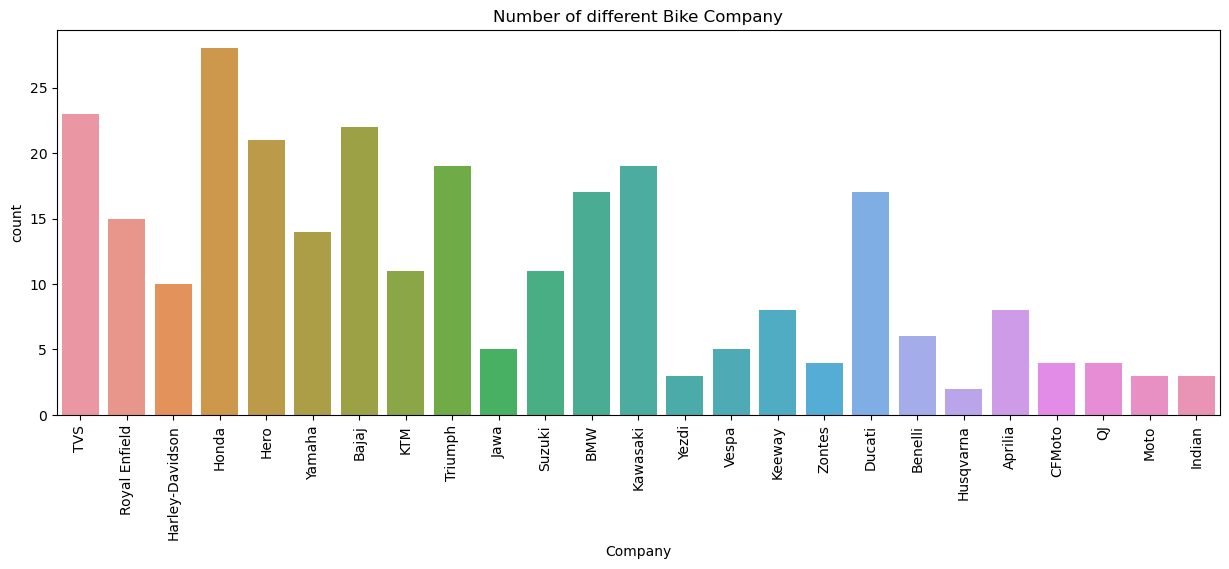

In [700]:
plt.figure(figsize = (15,5))
plt.title('Number of different Bike Company')
plt.xlabel('Company Name')
plt.ylabel('Number of Bikes')
sns.countplot(x = "Company", data = df_petrol)
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:>

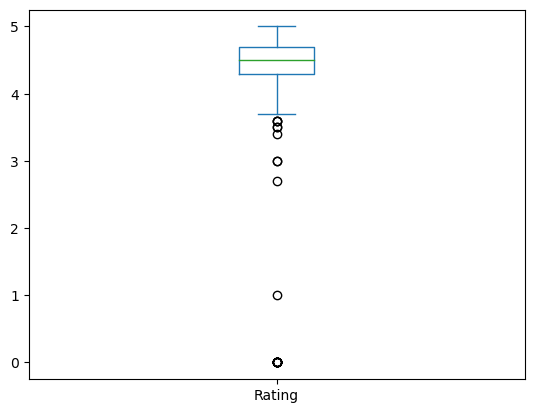

In [701]:
df_petrol['Rating'].plot(kind = "box")

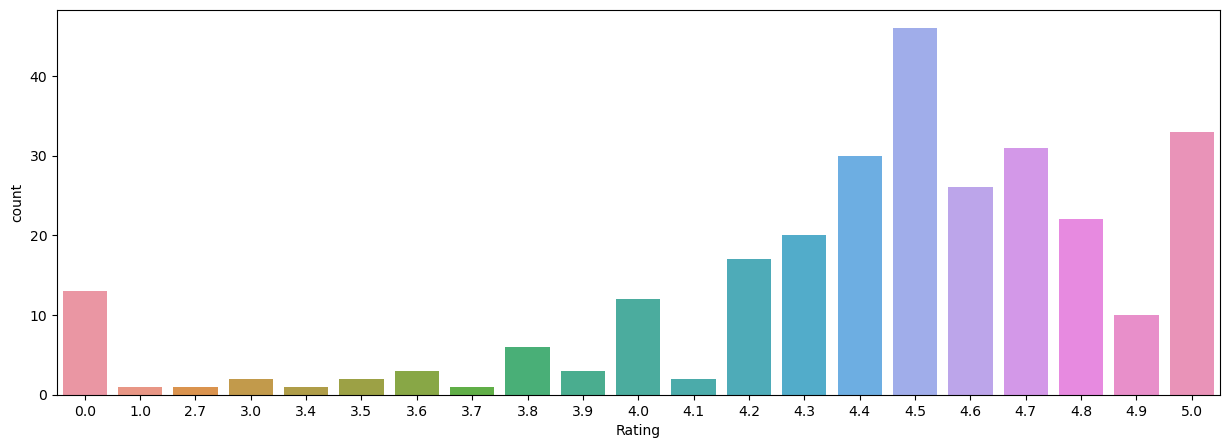

In [702]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'Rating', data = df_petrol)
plt.show()

<AxesSubplot:ylabel='Frequency'>

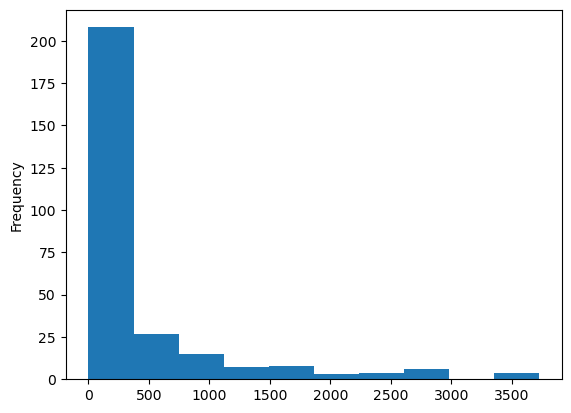

In [703]:
# plt.figure(figsize = (100,10))
# sns.countplot(x = 'No_of_Rating', data = df_petrol)
# plt.show()
df_petrol['No_of_Rating'].plot(kind = 'hist')

<AxesSubplot:>

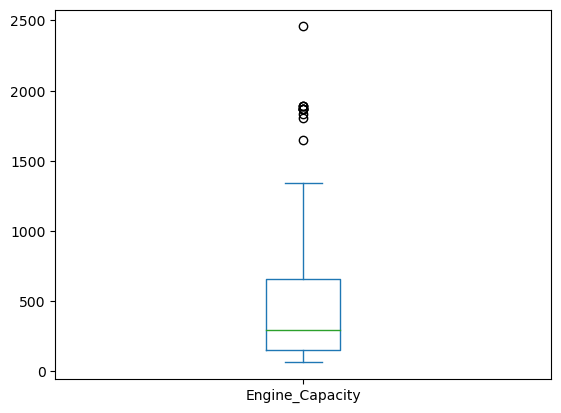

In [704]:
df_petrol['Engine_Capacity'].plot(kind = 'box')

In [705]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          365 non-null    object 
 1   Model            365 non-null    object 
 2   Rating           365 non-null    float64
 3   No_of_Rating     365 non-null    float64
 4   Engine_Capacity  283 non-null    float64
 5   BHP              275 non-null    float64
 6   Weight           355 non-null    float64
 7   Cost             358 non-null    float64
dtypes: float64(6), object(2)
memory usage: 22.9+ KB


(array([ 4., 62., 50., 72., 57., 20.,  5.,  5.,  4.,  3.]),
 array([ 60.,  93., 126., 159., 192., 225., 258., 291., 324., 357., 390.]),
 <BarContainer object of 10 artists>)

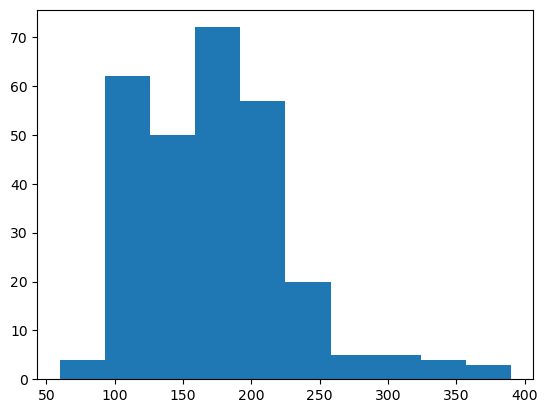

In [714]:
plt.hist(df_petrol['Weight'])

In [707]:
ind = df_petrol[df_petrol['Weight']<50].index

In [708]:
df_petrol['Weight'].mean()

171.2014184397163

In [709]:
df_petrol['Weight'].mode()

0    115.0
Name: Weight, dtype: float64

In [710]:
for i in ind:
    df_petrol['Weight'][i] = abs(df_petrol['Weight'].mean())

C:\Users\bayus\AppData\Local\Temp\ipykernel_31876\4105423156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_petrol['Weight'][i] = abs(df_petrol['Weight'].mean())


In [713]:
for i in ind:
    print(df_petrol.iloc[i])

Company                      Jawa
Model              Jawa 42 Bobber
Rating                        4.6
No_of_Rating                 46.0
Engine_Capacity             334.0
BHP                          30.2
Weight                 171.201418
Cost                     214450.0
Name: 85, dtype: object
Company                 Zontes
Model              Zontes 350R
Rating                     4.3
No_of_Rating              18.0
Engine_Capacity          348.0
BHP                       38.2
Weight              171.701423
Cost                  325000.0
Name: 156, dtype: object
Company                 Zontes
Model              Zontes 350T
Rating                     4.9
No_of_Rating               7.0
Engine_Capacity          348.0
BHP                       38.2
Weight              172.174833
Cost                  347000.0
Name: 234, dtype: object
Company                   Keeway
Model              Keeway K300 N
Rating                       4.4
No_of_Rating                 5.0
Engine_Capacity           

In [711]:
df_petrol

,Company,Model,Rating,No_of_Rating,Engine_Capacity,BHP,Weight,Cost
0,TVS,TVS Raider 125,4.3,1029.0,124.80,11.20,123.0,97054.0
1,Royal Enfield,Royal Enfield Hunter 350,4.6,535.0,349.34,20.20,177.0,149900.0
2,Harley-Davidson,Harley-Davidson X440,4.8,118.0,440.00,27.00,190.0,229000.0
3,Honda,Honda SP 125,4.4,1247.0,124.00,10.72,116.0,86749.0
4,Hero,Hero Splendor Plus,4.5,2497.0,97.20,7.91,112.0,73059.0
...,...,...,...,...,...,...,...,...
278,Honda,Honda Africa Twin,4.8,4.0,1082.00,97.89,239.0,1601500.0
279,Ducati,Ducati DesertX,3.0,2.0,937.00,108.60,223.0,1791000.0
280,Kawasaki,Kawasaki KLX230RS,5.0,1.0,233.00,19.57,115.0,521000.0
281,Harley-Davidson,Harley-Davidson Road Glide Special,0.0,0.0,1868.00,92.50,387.0,4049000.0


In [712]:
df_petrol

,Company,Model,Rating,No_of_Rating,Engine_Capacity,BHP,Weight,Cost
0,TVS,TVS Raider 125,4.3,1029.0,124.80,11.20,123.0,97054.0
1,Royal Enfield,Royal Enfield Hunter 350,4.6,535.0,349.34,20.20,177.0,149900.0
2,Harley-Davidson,Harley-Davidson X440,4.8,118.0,440.00,27.00,190.0,229000.0
3,Honda,Honda SP 125,4.4,1247.0,124.00,10.72,116.0,86749.0
4,Hero,Hero Splendor Plus,4.5,2497.0,97.20,7.91,112.0,73059.0
...,...,...,...,...,...,...,...,...
278,Honda,Honda Africa Twin,4.8,4.0,1082.00,97.89,239.0,1601500.0
279,Ducati,Ducati DesertX,3.0,2.0,937.00,108.60,223.0,1791000.0
280,Kawasaki,Kawasaki KLX230RS,5.0,1.0,233.00,19.57,115.0,521000.0
281,Harley-Davidson,Harley-Davidson Road Glide Special,0.0,0.0,1868.00,92.50,387.0,4049000.0


In [715]:
df_petrol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 0 to 282
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          282 non-null    object 
 1   Model            282 non-null    object 
 2   Rating           282 non-null    float64
 3   No_of_Rating     282 non-null    float64
 4   Engine_Capacity  282 non-null    float64
 5   BHP              274 non-null    float64
 6   Weight           282 non-null    float64
 7   Cost             282 non-null    float64
dtypes: float64(6), object(2)
memory usage: 27.9+ KB


<AxesSubplot:ylabel='Frequency'>

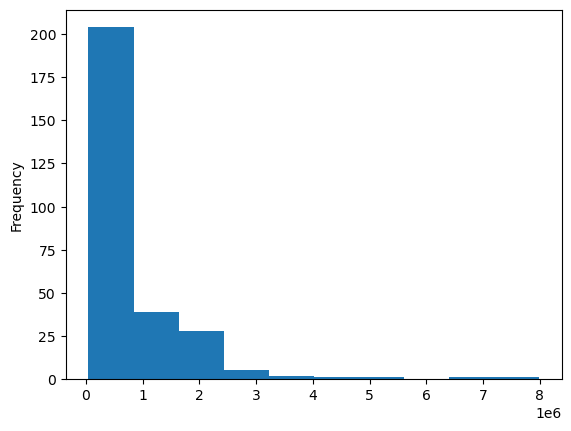

In [716]:
df_petrol['Cost'].plot(kind = 'hist')

<AxesSubplot:xlabel='Rating', ylabel='Cost'>

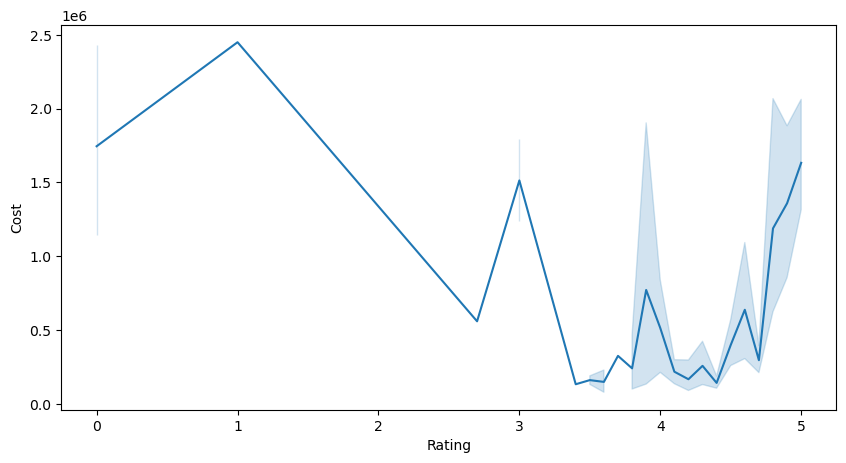

In [730]:
plt.figure(figsize = (10, 5))
sns.lineplot(x = 'Rating', y = 'Cost', data = df_petrol)

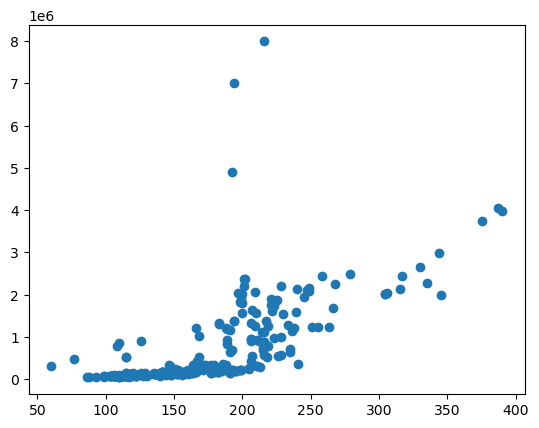

In [731]:
plt.scatter(df_petrol['Weight'], df_petrol['Cost'])

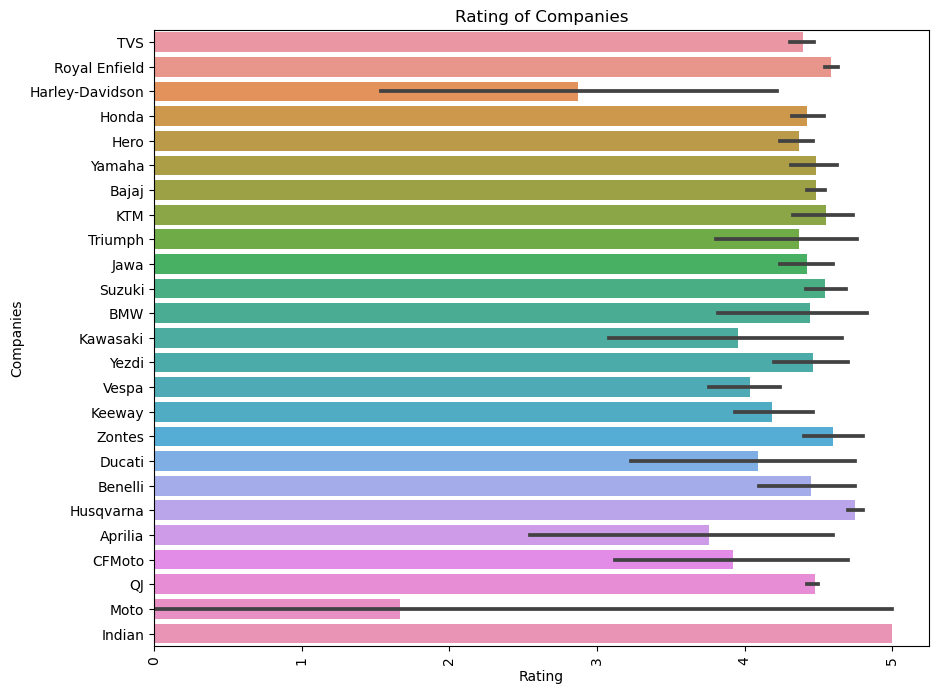

In [742]:
plt.figure(figsize = (10, 8))

sns.barplot(x = 'Rating', y = 'Company', data = df_petrol)

plt.title('Rating of Companies')
plt.xlabel('Rating')
plt.ylabel('Companies')
plt.xticks(rotation = 90)
plt.show()

In [748]:
df_petrol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 0 to 282
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          282 non-null    object 
 1   Model            282 non-null    object 
 2   Rating           282 non-null    float64
 3   No_of_Rating     282 non-null    float64
 4   Engine_Capacity  282 non-null    float64
 5   BHP              274 non-null    float64
 6   Weight           282 non-null    float64
 7   Cost             282 non-null    float64
dtypes: float64(6), object(2)
memory usage: 27.9+ KB


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

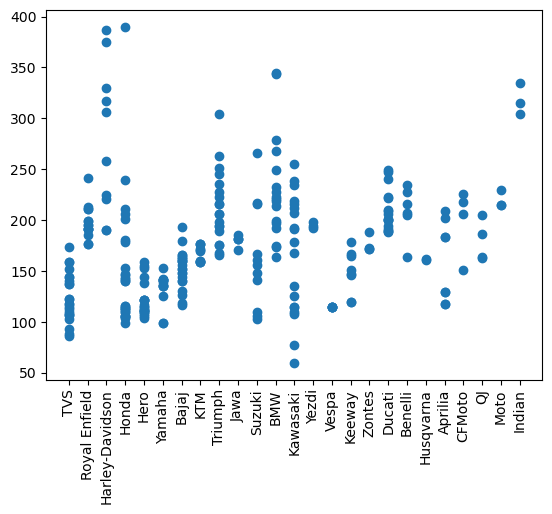

In [751]:
plt.scatter(df_petrol['Company'], df_petrol['Weight'])
plt.xticks(rotation = 90)

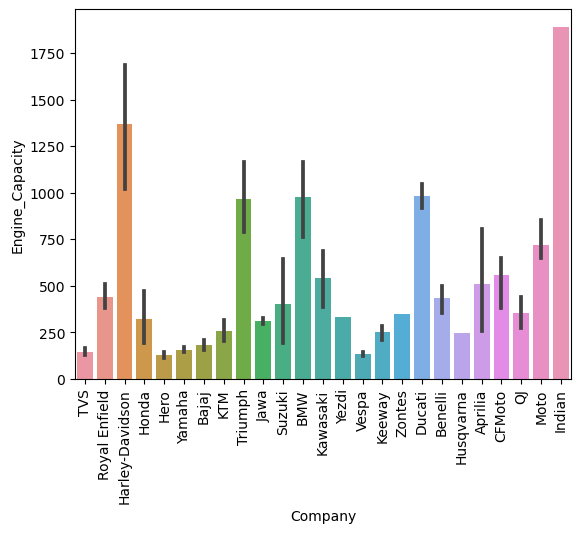

In [754]:
sns.barplot(x = 'Company', y = 'Engine_Capacity', data = df_petrol)
plt.xticks(rotation = 90)
plt.show()

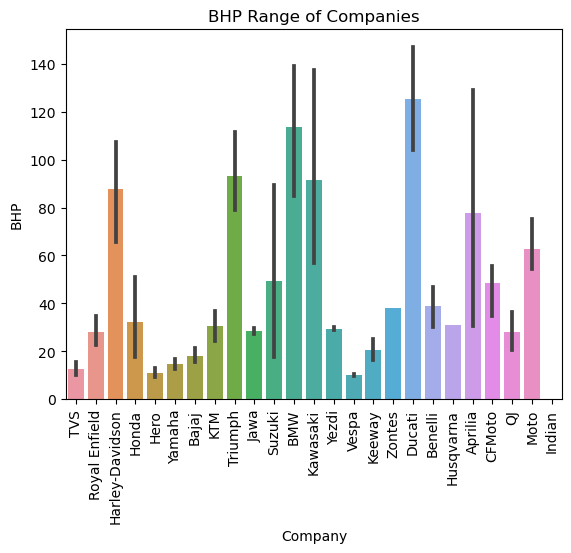

In [791]:
sns.barplot(x = 'Company', y = 'BHP', data = df_petrol)

plt.title('BHP Range of Companies')
plt.xticks(rotation = 90)
plt.show()

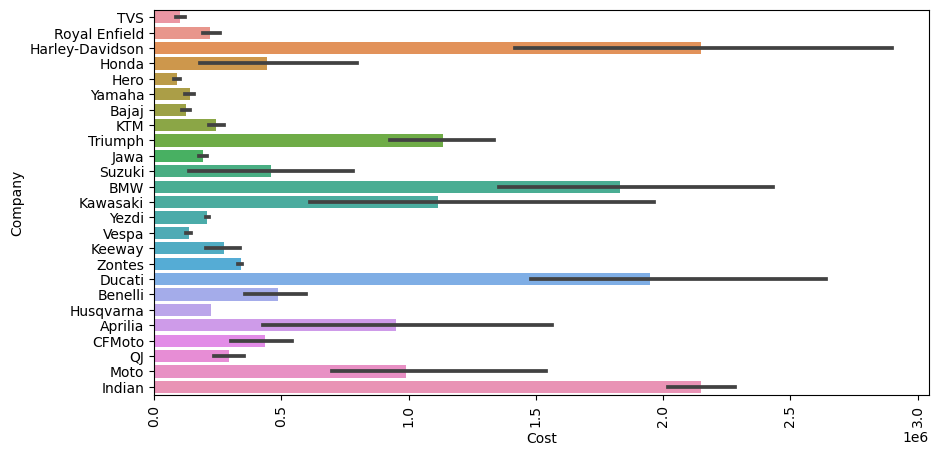

In [757]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'Cost', y = 'Company', data = df_petrol, orient = 'h')
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:>

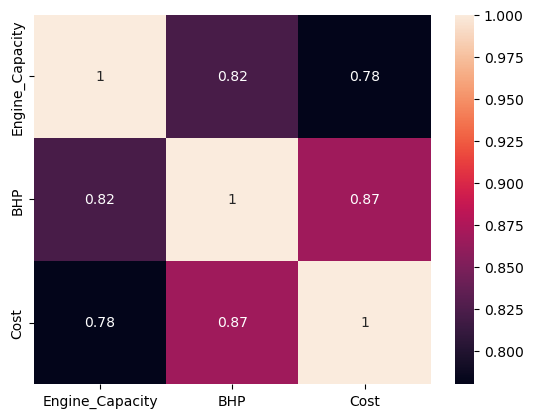

In [799]:
sns.heatmap(df_petrol[['Engine_Capacity', 'BHP', 'Cost']].corr(), annot = True)

<AxesSubplot:>

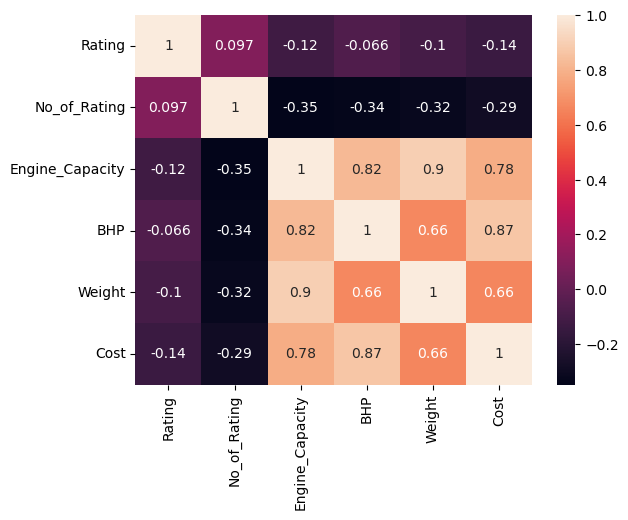

In [807]:
sns.heatmap(df_petrol.corr(), annot = True)

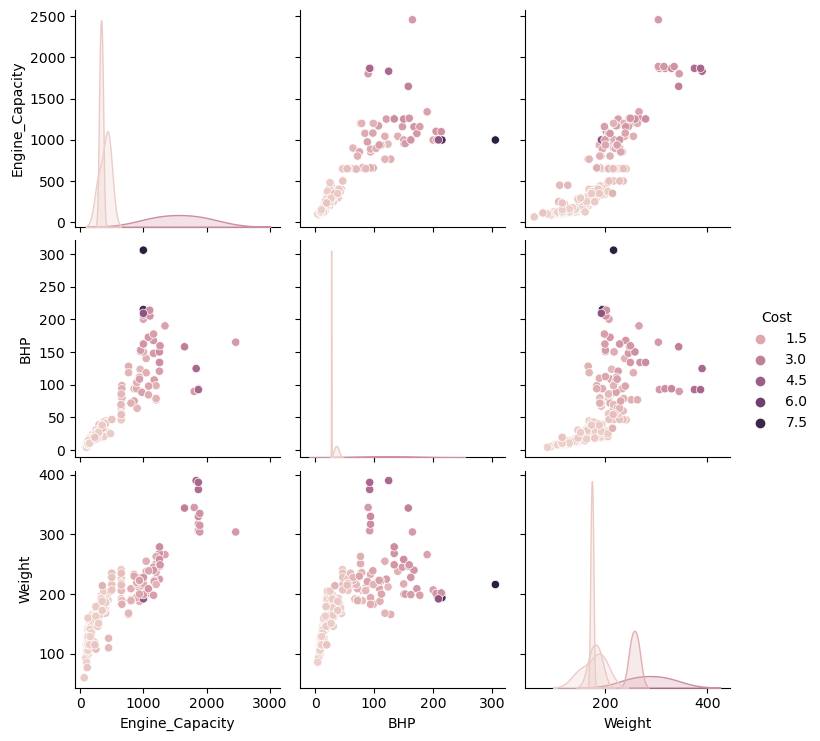

In [808]:
sns.pairplot(data = df_petrol, vars = ['Engine_Capacity', 'BHP', 'Weight'], hue = 'Cost')

In [759]:
df_electric = pd.read_csv('Electric_Bike_Data')

In [760]:
df_electric.head()

,Company,Model,Rating,No_of_Rating,Cost
0,Honda,Honda SP160,4.1,16.0,118103
1,Honda,Honda SP160,4.1,16.0,118103
2,OLA,OLA S1 Air,4.5,71.0,119827
3,OLA,OLA S1 Pro,4.1,245.0,139828
4,TVS,TVS iQube,3.2,141.0,131964


In [761]:
df_electric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       82 non-null     object 
 1   Model         82 non-null     object 
 2   Rating        82 non-null     float64
 3   No_of_Rating  82 non-null     float64
 4   Cost          82 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 3.3+ KB


(array([62.,  6.,  3.,  4.,  2.,  0.,  2.,  1.,  1.,  1.]),
 array([  0. ,  34.8,  69.6, 104.4, 139.2, 174. , 208.8, 243.6, 278.4,
        313.2, 348. ]),
 <BarContainer object of 10 artists>)

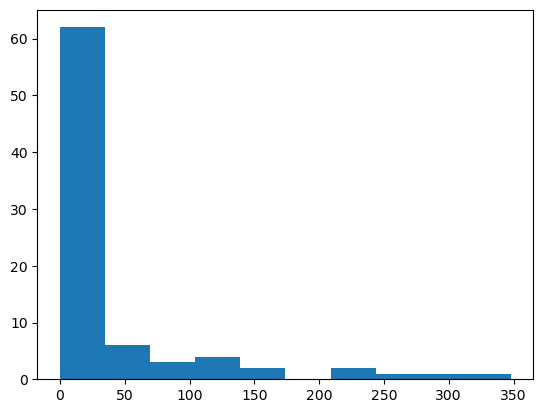

In [766]:
plt.hist(df_electric['No_of_Rating'])

In [767]:
df_electric

,Company,Model,Rating,No_of_Rating,Cost
0,Honda,Honda SP160,4.1,16.0,118103
1,Honda,Honda SP160,4.1,16.0,118103
2,OLA,OLA S1 Air,4.5,71.0,119827
3,OLA,OLA S1 Pro,4.1,245.0,139828
4,TVS,TVS iQube,3.2,141.0,131964
...,...,...,...,...,...
77,Ampere,Ampere Zeal EX,5.0,1.0,96544
78,Hero,Hero Destini Prime,0.0,0.0,75967
79,OLA,OLA S1 X,4.5,4.0,90019
80,OLA,OLA S1 Pro Gen 2,0.0,0.0,141203


In [780]:
ind = df_electric[df_electric['Company'] == 'Kawasaki'].index

In [781]:
for i in ind:
    print(i)

9
32
62
81


In [782]:
for i in ind:
    df_electric.drop(i, inplace = True)

In [784]:
df_electric

,Company,Model,Rating,No_of_Rating,Cost
0,Honda,Honda SP160,4.1,16.0,118103
1,Honda,Honda SP160,4.1,16.0,118103
2,OLA,OLA S1 Air,4.5,71.0,119827
3,OLA,OLA S1 Pro,4.1,245.0,139828
4,TVS,TVS iQube,3.2,141.0,131964
...,...,...,...,...,...
76,Okaya,Okaya Freedum,0.0,0.0,74899
77,Ampere,Ampere Zeal EX,5.0,1.0,96544
78,Hero,Hero Destini Prime,0.0,0.0,75967
79,OLA,OLA S1 X,4.5,4.0,90019


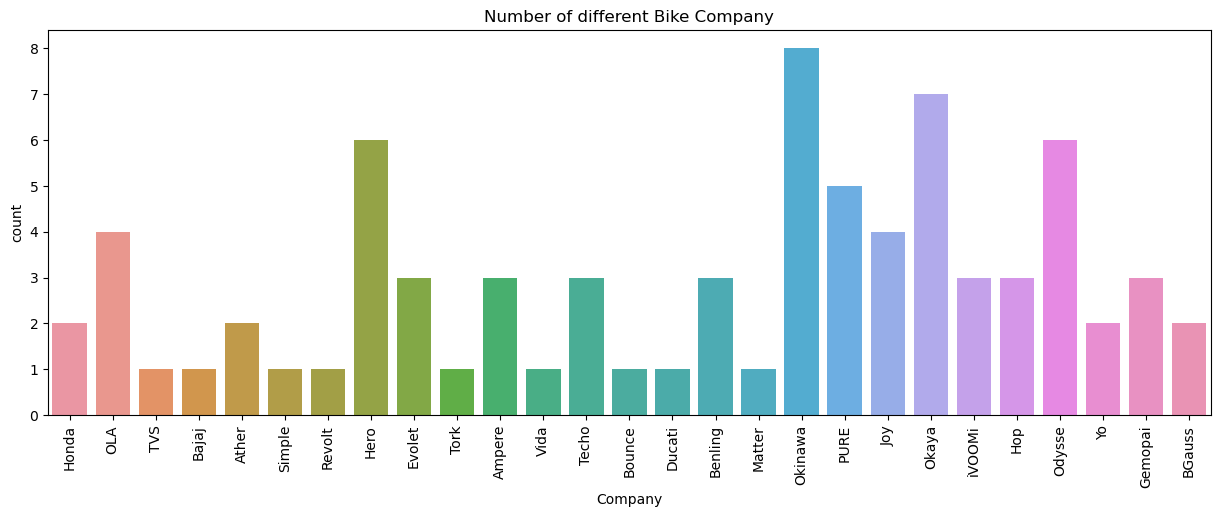

In [785]:
plt.figure(figsize = (15,5))
plt.title('Number of different Bike Company')
plt.xlabel('Company Name')
plt.ylabel('Number of Bikes')
sns.countplot(x = "Company", data = df_electric)
plt.xticks(rotation = 90)
plt.show()

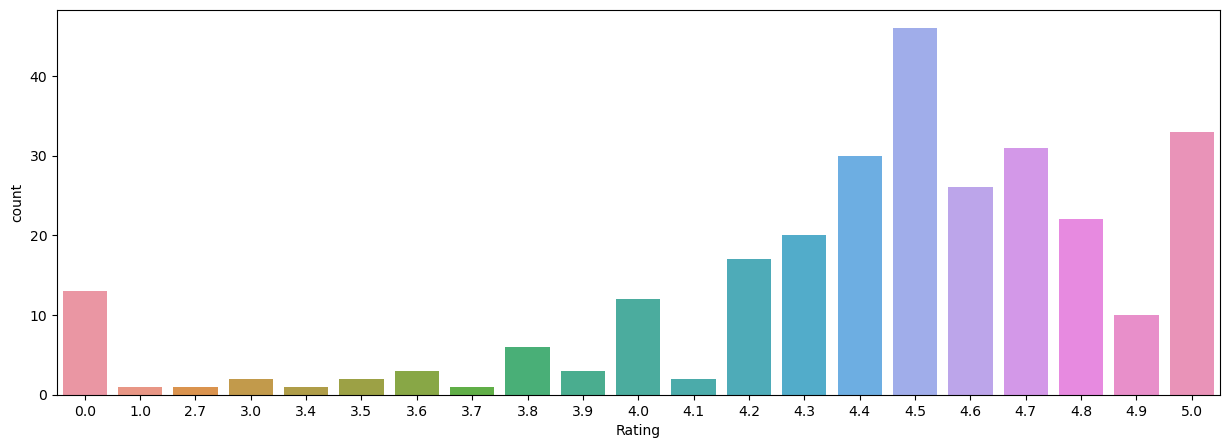

In [786]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'Rating', data = df_petrol)
plt.show()

In [787]:
df_electric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 0 to 80
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       78 non-null     object 
 1   Model         78 non-null     object 
 2   Rating        78 non-null     float64
 3   No_of_Rating  78 non-null     float64
 4   Cost          78 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 3.7+ KB


<AxesSubplot:xlabel='Rating', ylabel='Cost'>

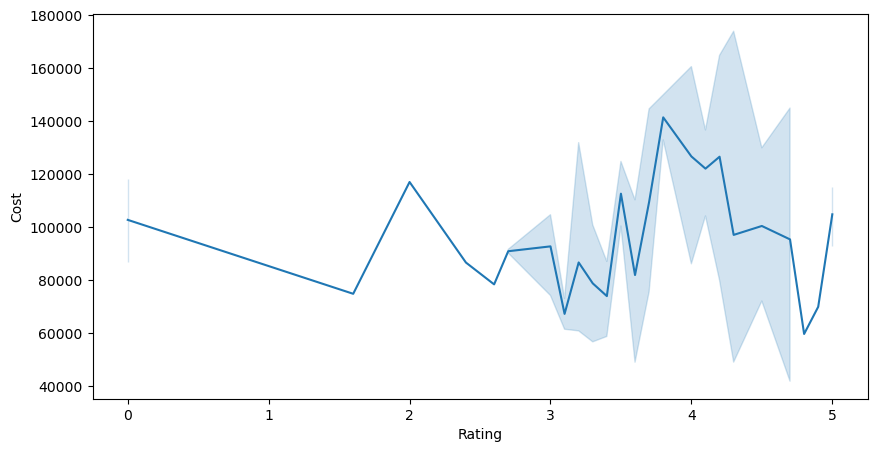

In [788]:
plt.figure(figsize = (10, 5))
sns.lineplot(x = 'Rating', y = 'Cost', data = df_electric)

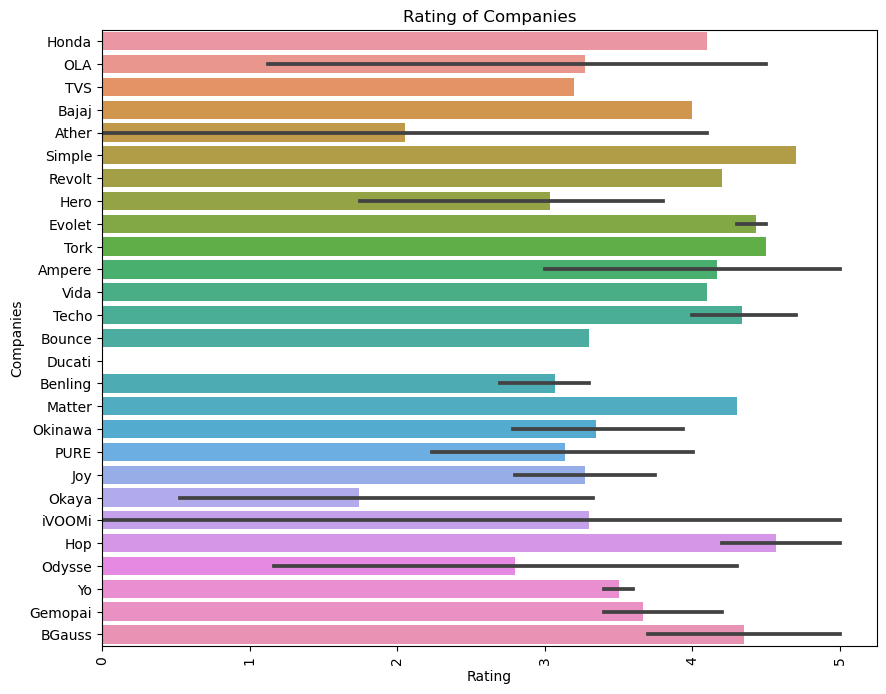

In [790]:
plt.figure(figsize = (10, 8))

sns.barplot(x = 'Rating', y = 'Company', data = df_electric)

plt.title('Rating of Companies')
plt.xlabel('Rating')
plt.ylabel('Companies')
plt.xticks(rotation = 90)
plt.show()

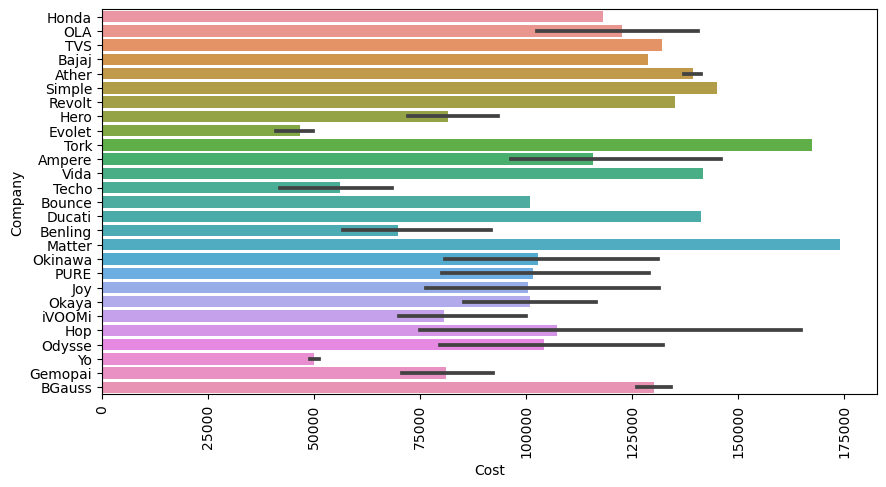

In [793]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'Cost', y = 'Company', data = df_electric, orient = 'h')
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:>

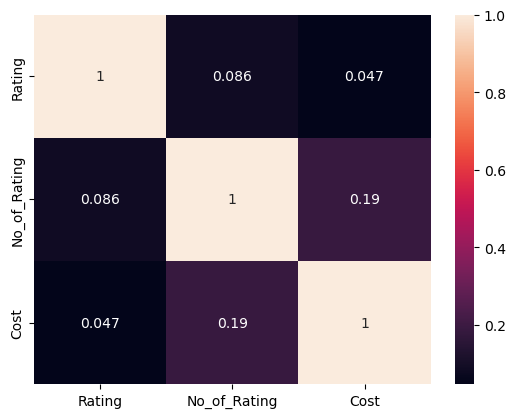

In [803]:
sns.heatmap(df_electric.corr(),annot=True)

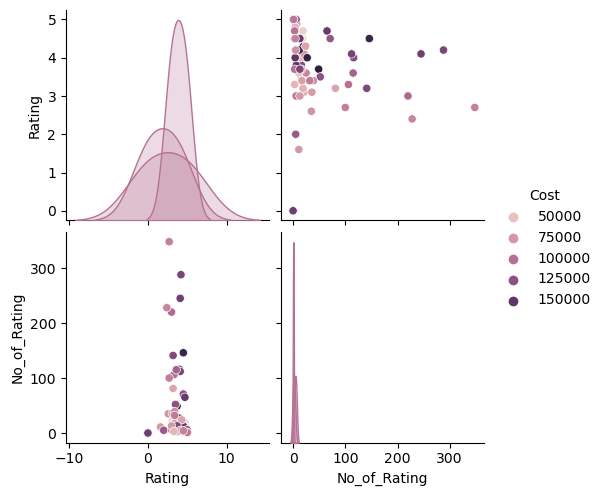

In [806]:
sns.pairplot(df_electric, hue = 'Cost')